# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import os
import pickle

# Visual Representation of Dataset

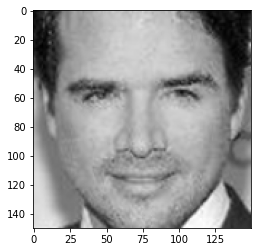

In [21]:
image = cv2.imread('C:\\Users\\user\\Mini Project VI\\Dataset\\without_mask\\18.png',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,[150,150])
plt.imshow(image,cmap='gray')

# Preprocessing of Training Data

without_mask   1
[[254 254 253 ... 252 252 252]
 [252 251 251 ... 254 254 254]
 [253 253 253 ... 253 253 253]
 ...
 [211 223 211 ... 110 108 105]
 [169 184 187 ... 110 108 105]
 [140 156 168 ... 110 109 106]]
with_mask   1
[[238 238 238 ... 200 200 199]
 [238 238 238 ... 196 197 197]
 [237 237 238 ... 192 194 194]
 ...
 [236 236 236 ... 151 151 152]
 [235 236 235 ... 151 152 152]
 [235 235 235 ... 151 152 152]]


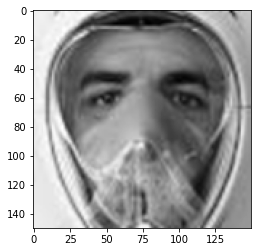

In [3]:
# main_dir = "C:\Users\user\Mini Project V\Dataset"
# train_dir = "train"
path_train = 'C:\\Users\\user\\Mini Project VI\\Dataset'

for name in os.listdir(path_train):
    for p in os.listdir(os.path.join(path_train,name)):
        category = p.split(".")[0]
        print(name," ",category)
        img_array = cv2.imread(os.path.join(os.path.join(os.path.join(path_train,name)),p),cv2.IMREAD_GRAYSCALE)
        print(img_array)
        new_img_array = cv2.resize(img_array, dsize=(150, 150))
        plt.imshow(new_img_array,cmap="gray")
        break

# Processing of Training Data

In [4]:
X = []
y = []

def create_test_data(path):
    count=0
    for name in os.listdir(path):
        for p in os.listdir(os.path.join(path,name)):
            print(name," ",count)
            img_array = cv2.imread(os.path.join(os.path.join(path,name),p),cv2.IMREAD_GRAYSCALE)
            print(img_array)
            new_img_array = np.array(cv2.resize(img_array, dsize=(150, 150)))
            X.append(new_img_array)
            y.append(count)
        count+=1

# Conversion of Image to Array Format

In [5]:
create_test_data(path_train)
X = np.array(X).reshape(-1, 150,150,1)
y = np.array(y)

without_mask   0
[[254 254 253 ... 252 252 252]
 [252 251 251 ... 254 254 254]
 [253 253 253 ... 253 253 253]
 ...
 [211 223 211 ... 110 108 105]
 [169 184 187 ... 110 108 105]
 [140 156 168 ... 110 109 106]]
without_mask   0
[[110 112 103 ... 116 112  89]
 [108 114 105 ... 107 113 107]
 [109 115 105 ...  95 111 122]
 ...
 [ 79  71  58 ...  71  59  51]
 [ 80  67  54 ...  56  48  47]
 [ 82  62  47 ...  52  40  40]]
without_mask   0
[[231 221 230 ... 140 150 180]
 [237 224 221 ... 132 130 173]
 [232 222 221 ... 150 143 162]
 ...
 [122  70  88 ...  74  79  88]
 [129  81  91 ...  69  80  93]
 [131  84  85 ...  64  67  92]]
without_mask   0
[[41 39 38 ... 45 39 43]
 [43 41 40 ... 41 35 40]
 [46 45 43 ... 35 31 34]
 ...
 [66 68 71 ... 45 46 47]
 [64 66 69 ... 50 48 48]
 [64 65 67 ... 52 49 48]]
without_mask   0
[[ 90 117 147 ... 216 222 230]
 [103 128 152 ... 202 224 234]
 [122 146 163 ... 181 218 231]
 ...
 [ 77  81  79 ... 125 125 122]
 [ 66  90  88 ... 122 124 131]
 [ 58  87  89 ... 134 1

without_mask   0
[[115 116 116 ...  22  22  22]
 [115 116 115 ...  22  22  22]
 [115 115 115 ...  21  21  21]
 ...
 [126 126 126 ...  25  24  25]
 [128 128 128 ...  24  24  24]
 [128 128 128 ...  24  24  24]]
without_mask   0
[[ 64  42  46 ...  22  21  13]
 [ 52  47  58 ...  18  18  17]
 [ 42  57  78 ...  12  14  21]
 ...
 [115 112  99 ... 165 158 151]
 [120 120 106 ... 170 167 161]
 [122 125 112 ... 175 174 175]]
without_mask   0
[[187 187 187 ...  13  13  13]
 [187 187 187 ...  13  13  13]
 [186 186 186 ...  13  13  13]
 ...
 [  8   8   8 ...  65  66  66]
 [  7   7   7 ...  67  67  67]
 [  7   7   7 ...  66  67  67]]
without_mask   0
[[126 135 116 ...  72  75  76]
 [129 118  89 ...  75  78  78]
 [121  87  57 ...  77  81  81]
 ...
 [ 14  19  24 ...  60  67  66]
 [ 17  22  25 ...  60  61  62]
 [ 19  22  25 ...  59  62  62]]
without_mask   0
[[72 68 63 ... 32 25 19]
 [72 63 59 ... 31 26 22]
 [67 55 57 ... 29 28 26]
 ...
 [33 37 40 ... 45 52 50]
 [31 35 39 ... 45 51 49]
 [29 33 37 ... 44

without_mask   0
[[ 46  46  48 ... 115 114 114]
 [ 46  46  48 ... 115 114 114]
 [ 47  47  49 ... 116 115 115]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
without_mask   0
[[153 164 167 ... 233 235 239]
 [161 160 164 ... 228 232 236]
 [153 150 161 ... 224 228 231]
 ...
 [150 149 146 ...   0  13  20]
 [150 149 146 ...   7  13  20]
 [149 148 145 ...  13  16  20]]
without_mask   0
[[10 10 10 ... 20 28 32]
 [10  9 11 ... 18 25 29]
 [10  9 13 ... 14 19 25]
 ...
 [21 24 24 ... 22 26 32]
 [21 26 21 ... 26 32 34]
 [21 25 21 ... 27 31 33]]
without_mask   0
[[ 19  16  13 ...   7   7   7]
 [ 20  16  13 ...   8   8   8]
 [ 21  17  14 ...   8   8   8]
 ...
 [ 21  22  20 ... 120  48  29]
 [ 18  20  19 ...  61  25  36]
 [ 12  15  18 ...  41  33  38]]
without_mask   0
[[ 37  37  38 ...  62  62  62]
 [ 38  37  39 ...  62  62  62]
 [ 38  37  41 ...  61  62  62]
 ...
 [131 121 139 ...  73  71  69]
 [126  83  87 ...  67  65  63]
 [130  86  71 ...  67  

without_mask   0
[[135 132 128 ... 111 122 124]
 [123 121 120 ...  98 112 115]
 [105 105 106 ...  74  98 108]
 ...
 [  3  15  16 ...   4  15  31]
 [  2  13  14 ...   4  19  43]
 [  2  12  15 ...   5  24  51]]
without_mask   0
[[145 142 136 ... 136 135 135]
 [145 141 133 ... 136 135 135]
 [146 141 130 ... 136 135 135]
 ...
 [163 159 155 ... 148 148 149]
 [165 160 154 ... 148 147 148]
 [164 161 155 ... 148 147 148]]
without_mask   0
[[181 183 183 ... 103 100  97]
 [179 185 185 ... 107 103  98]
 [178 183 184 ... 111 107 103]
 ...
 [ 72  64  49 ... 129 133 130]
 [157 153 137 ... 133 136 134]
 [161 142 141 ... 135 139 137]]
without_mask   0
[[  8   8  10 ... 104 113 112]
 [  8   9  10 ... 106 113 112]
 [  8   9  10 ... 110 115 112]
 ...
 [ 71  70  69 ...  65  66  66]
 [ 72  72  70 ...  64  65  67]
 [ 73  72  71 ...  63  64  67]]
without_mask   0
[[ 12  26  20 ...  34  58  43]
 [ 17  16  43 ...  14  19  36]
 [ 31  46  64 ...  27  25  15]
 ...
 [248 202 170 ... 160 155 153]
 [243 187 159 ... 

without_mask   0
[[ 3  3  3 ...  5  4  4]
 [ 3  3  3 ...  5  4  4]
 [ 2  2  3 ...  5  4  3]
 ...
 [19 19 18 ...  4  4  4]
 [18 18 18 ...  4  4  4]
 [18 18 18 ...  4  4  4]]
without_mask   0
[[200 200 200 ...  93 102 110]
 [200 200 200 ...  93 101 109]
 [200 200 200 ...  93  98 105]
 ...
 [200 198 196 ... 193 195 196]
 [202 199 196 ... 193 195 196]
 [198 197 197 ... 192 194 196]]
without_mask   0
[[ 19  18  28 ...  96  91 122]
 [ 15  20  32 ...  77  83 121]
 [ 11  25  36 ...  64  80 124]
 ...
 [ 25  37  33 ...  13  12  12]
 [ 22  32  34 ...  13  16  18]
 [ 18  36  46 ...  13  13  14]]
without_mask   0
[[ 73  76  84 ...  53  56  57]
 [ 74  83  87 ...  50  54  60]
 [ 75  87  91 ...  48  56  61]
 ...
 [ 46  44  49 ... 100  92  84]
 [ 48  44  48 ... 103  97  91]
 [ 50  45  49 ... 100  98  92]]
without_mask   0
[[140 140 139 ... 101 103 112]
 [141 141 140 ...  96 101 114]
 [142 142 141 ...  93 100 115]
 ...
 [166 159 154 ... 130 131 130]
 [160 152 148 ... 130 131 130]
 [147 141 140 ... 131 1

[[  2   2   2 ... 179 179 179]
 [  1   2   2 ... 179 179 179]
 [  1   2   2 ... 179 179 179]
 ...
 [249 251 249 ... 177 184 189]
 [243 246 246 ... 139 148 153]
 [243 246 248 ... 104 112 117]]
without_mask   0
[[ 71  66  64 ... 117 126 129]
 [ 72  78  56 ... 104 103 147]
 [ 69  85  58 ... 116 122 115]
 ...
 [161 161 162 ... 155 154 152]
 [161 162 163 ... 154 153 153]
 [161 163 165 ... 154 153 153]]
without_mask   0
[[37 38 37 ... 48 45 40]
 [34 34 33 ... 49 46 43]
 [32 32 30 ... 50 46 44]
 ...
 [ 7  8 10 ...  8 10  9]
 [ 9 10 12 ...  9 11 11]
 [10 11 13 ...  9 12 11]]
without_mask   0
[[87 70 57 ... 71 72 78]
 [74 65 58 ... 74 74 81]
 [60 61 59 ... 75 73 80]
 ...
 [77 77 71 ... 66 69 73]
 [81 79 68 ... 68 70 74]
 [80 77 64 ... 69 70 74]]
without_mask   0
[[178 181 144 ...  54  34  26]
 [177 174 121 ...  62  46  35]
 [177 157  94 ...  59  61  53]
 ...
 [183 184 184 ...  31  38  43]
 [183 184 184 ...  27  33  38]
 [183 184 184 ...  25  30  34]]
without_mask   0
[[ 38  38  41 ... 196 196 1

without_mask   0
[[44 43 41 ... 62 67 72]
 [43 42 39 ... 56 61 67]
 [42 40 37 ... 49 54 61]
 ...
 [66 67 70 ... 91 92 92]
 [67 69 72 ... 92 93 94]
 [69 70 73 ... 94 94 94]]
without_mask   0
[[228 228 228 ...  37  38  37]
 [228 228 229 ...  32  31  33]
 [228 229 228 ...  40  32  29]
 ...
 [254 254 254 ...  97  97  98]
 [254 254 254 ... 102 104 103]
 [254 254 254 ... 106 107 107]]
without_mask   0
[[42 47 46 ...  8  5  2]
 [48 47 40 ...  6  5  5]
 [52 44 35 ...  4  6  7]
 ...
 [16 13 10 ... 42 49 50]
 [15 14 12 ... 46 52 50]
 [15 15 13 ... 47 53 50]]
without_mask   0
[[  7   6   6 ... 172 172 172]
 [  6   6   6 ... 172 172 172]
 [  6   6   6 ... 172 172 172]
 ...
 [ 34  31  28 ... 196 196 196]
 [ 35  31  29 ... 196 196 196]
 [ 34  32  29 ... 196 196 196]]
without_mask   0
[[176 180 182 ... 187 192 196]
 [177 182 183 ... 187 197 205]
 [180 185 186 ... 192 204 214]
 ...
 [196 138  57 ...  70  55  73]
 [184 111  35 ...  96  87  83]
 [158  81  20 ... 112 110  90]]
without_mask   0
[[222 179 

[[122 126 129 ... 233 238 239]
 [126 121 126 ... 230 236 237]
 [129 115 122 ... 227 235 236]
 ...
 [ 79  88  99 ... 235 238 237]
 [ 76  84  94 ... 231 233 233]
 [ 74  80  88 ... 230 233 233]]
without_mask   0
[[123 128 136 ... 119 108 114]
 [127 128 133 ... 116 121 121]
 [129 130 134 ... 115 121 115]
 ...
 [180 154 142 ... 116 114 119]
 [175 153 145 ... 117 113 117]
 [166 151 148 ... 119 113 115]]
without_mask   0
[[42 40 37 ... 21 22 24]
 [46 45 41 ... 23 23 25]
 [50 51 46 ... 22 23 26]
 ...
 [68 69 71 ... 46 48 48]
 [67 69 72 ... 46 47 45]
 [68 71 74 ... 46 47 46]]
without_mask   0
[[ 38  41  39 ...  67  59  58]
 [ 34  44  44 ...  71  74  67]
 [ 36  51  47 ...  74  75  61]
 ...
 [ 37  39  39 ...  41  50  38]
 [ 38  40  39 ...  72  34  41]
 [ 38  40  39 ... 121  60  97]]
without_mask   0
[[132 151 155 ... 129 129 128]
 [140 158 165 ... 129 129 129]
 [152 168 176 ... 129 129 129]
 ...
 [108 111 115 ...  94  97 100]
 [111 111 114 ...  92  98 102]
 [139 129 123 ...  94 101 105]]
without_

without_mask   0
[[170 183 198 ... 140 141 148]
 [173 189 202 ... 139 139 149]
 [178 193 204 ... 139 141 143]
 ...
 [126 144 138 ... 159 182 182]
 [126 142 136 ... 160 184 186]
 [128 136 134 ... 158 180 189]]
without_mask   0
[[ 38  43  42 ...  93  97  98]
 [ 38  41  42 ...  92  94  96]
 [ 37  39  42 ...  94  93  95]
 ...
 [186 157 166 ... 163 163 164]
 [182 159 152 ... 163 163 164]
 [162 200 131 ... 163 164 164]]
without_mask   0
[[ 66  83  89 ...  22  21  22]
 [ 26  36  33 ...  22  22  24]
 [  9  12   9 ...  25  24  24]
 ...
 [110 103  86 ...  41  32  28]
 [108  99  82 ...  51  33  23]
 [100  89  86 ...  53  23  23]]
without_mask   0
[[ 93  96  97 ...  37  35  32]
 [ 94  97  98 ...  41  38  36]
 [ 96  98  99 ...  44  42  39]
 ...
 [105 105 105 ...  82  83  89]
 [104 105 104 ...  87  91  97]
 [103 104 104 ...  92  97 103]]
without_mask   0
[[83 80 74 ... 51 57 60]
 [80 78 72 ... 54 60 64]
 [75 73 67 ... 58 64 66]
 ...
 [71 70 68 ... 19 20 20]
 [70 69 66 ... 19 20 21]
 [69 68 66 ... 19

without_mask   0
[[ 91  99 108 ... 138 171 186]
 [ 93  96 102 ... 135 168 186]
 [ 91  92  97 ... 145 176 192]
 ...
 [135 137 136 ... 225 225 225]
 [131 134 135 ... 225 225 225]
 [125 128 135 ... 225 225 225]]
without_mask   0
[[ 41  41  41 ...  21  21  24]
 [ 41  41  41 ...  23  22  25]
 [ 41  41  40 ...  29  28  29]
 ...
 [ 34  34  34 ...  84  94 101]
 [ 34  34  34 ...  93 103 107]
 [ 35  35  35 ... 100 107 111]]
without_mask   0
[[ 84  78  82 ... 116 120 121]
 [ 82  83  82 ... 118 123 123]
 [ 68  76  85 ... 121 125 127]
 ...
 [ 28  33  42 ...  81  76  65]
 [ 36  33  32 ...  66  77  91]
 [ 44  38  29 ...  54  72 102]]
without_mask   0
[[110 103  90 ... 134 115  73]
 [105 101  87 ... 113 115  76]
 [ 99  98  83 ...  98  97 101]
 ...
 [128 128 128 ... 128 127 127]
 [129 130 130 ... 128 127 127]
 [128 129 129 ... 128 127 127]]
without_mask   0
[[ 66  80  76 ... 183 209 212]
 [ 68  58  61 ... 198 192 215]
 [ 60  38  71 ... 183 183 206]
 ...
 [189 196 186 ... 186 183 176]
 [190 195 187 ... 

without_mask   0
[[161 164 151 ...  45  51  50]
 [165 164 145 ...  44  51  53]
 [178 172 143 ...  43  47  52]
 ...
 [217 236 229 ... 154 177 173]
 [225 232 226 ... 163 178 180]
 [225 223 231 ... 169 172 187]]
without_mask   0
[[34 26 18 ... 95 95 90]
 [30 27 20 ... 93 92 90]
 [29 31 25 ... 90 90 89]
 ...
 [31 20 29 ... 30 30 27]
 [24 25 24 ... 30 28 25]
 [14 24 16 ... 30 27 24]]
without_mask   0
[[87 54 33 ... 41 41 49]
 [62 32 24 ... 43 41 46]
 [39 22 24 ... 48 47 49]
 ...
 [19 25 26 ... 18 18 19]
 [18 21 22 ... 18 17 18]
 [18 20 22 ... 20 19 19]]
without_mask   0
[[ 75  80  82 ... 128 114  94]
 [108 117 127 ... 113 113 100]
 [126 139 153 ... 107 107 102]
 ...
 [149 144 139 ... 136 157 164]
 [153 147 137 ... 133 152 160]
 [155 148 135 ... 130 148 155]]
without_mask   0
[[  4   4   6 ... 106  70  34]
 [  4   5   6 ... 114  75  38]
 [  4   6   6 ... 123  82  43]
 ...
 [ 24  30  41 ...  37  43  45]
 [ 20  27  38 ...  48  51  51]
 [ 19  25  37 ...  50  51  49]]
without_mask   0
[[ 11  11 

without_mask   0
[[39 39 37 ...  7  7 10]
 [40 40 39 ...  6  7  9]
 [41 42 40 ...  5  8  9]
 ...
 [ 8  5  4 ...  1  1  1]
 [ 8  5  3 ...  1  1  1]
 [ 7  4  2 ...  1  1  2]]
without_mask   0
[[14 15 15 ... 21 23 24]
 [13 13 13 ... 20 20 22]
 [11 11 11 ... 18 18 18]
 ...
 [18 15 11 ... 20 14 10]
 [16 13 10 ... 21 15 11]
 [14 11  9 ... 25 22 18]]
without_mask   0
[[ 24  23  24 ...  36  37  33]
 [ 26  25  25 ...  31  34  34]
 [ 27  27  27 ...  31  33  33]
 ...
 [ 26  25  24 ... 157  82  53]
 [ 26  26  25 ... 129  58  53]
 [ 24  25  26 ... 111  41  50]]
without_mask   0
[[ 90  89  87 ...  50  50  50]
 [ 89  88  86 ...  50  50  50]
 [ 88  87  85 ...  49  49  49]
 ...
 [198 206 211 ...   8   8   7]
 [201 211 214 ...   7   7   8]
 [205 213 216 ...   6   8   9]]
without_mask   0
[[25 25 23 ... 25 28 26]
 [25 25 24 ... 24 28 27]
 [25 25 25 ... 23 28 27]
 ...
 [27 29 26 ... 23 23 24]
 [28 29 26 ... 23 22 24]
 [29 30 26 ... 24 21 25]]
without_mask   0
[[24 24 24 ... 50 49 49]
 [24 24 24 ... 50 49 

without_mask   0
[[ 42  41  43 ...  48  46  52]
 [ 50  52  53 ...  47  42  48]
 [ 55  60  62 ...  48  41  42]
 ...
 [ 51  52  57 ...  27  35  69]
 [ 77  91  97 ...  27  26  44]
 [116 135 132 ...  31  26  32]]
without_mask   0
[[ 81  87  95 ...  94  91  91]
 [ 78  83  89 ...  94  92  91]
 [ 75  79  85 ...  94  92  90]
 ...
 [ 50  60  91 ... 216 220 223]
 [ 38  54  93 ... 197 199 206]
 [ 27  45  89 ... 196 193 196]]
without_mask   0
[[106 110 108 ... 240 243 239]
 [109 111 107 ... 229 237 234]
 [111 111 106 ... 215 229 229]
 ...
 [ 61  59  61 ...  44  48  48]
 [ 62  63  66 ...  41  44  45]
 [ 64  66  68 ...  38  41  43]]
without_mask   0
[[232 233 232 ... 235 234 235]
 [235 229 238 ... 235 236 236]
 [239 229 242 ... 235 239 238]
 ...
 [239 238 245 ... 143 145 148]
 [239 239 242 ... 148 149 148]
 [239 240 237 ... 151 150 146]]
without_mask   0
[[35 33 33 ... 61 55 65]
 [37 36 35 ... 56 45 58]
 [37 37 38 ... 62 56 52]
 ...
 [47 39 37 ...  8 16 55]
 [45 37 35 ...  0 15 33]
 [43 35 34 ...  0

[[ 50  50  51 ... 119 120 120]
 [ 54  45  40 ... 121 121 122]
 [ 56  46  36 ... 123 123 124]
 ...
 [ 29  28  33 ...  56  55  63]
 [ 27  28  27 ...  65  61  57]
 [ 26  26  26 ...  64  61  58]]
without_mask   0
[[148  82  25 ...  75  58  35]
 [158  82  31 ...  71  47  30]
 [128  70  42 ...  72  44  27]
 ...
 [ 48  56  61 ...  88  68  63]
 [ 61  62  59 ...  78  61  65]
 [ 70  65  54 ...  67  62  60]]
without_mask   0
[[  8   8  17 ...   2   2   2]
 [  9   8  12 ...   3   3   3]
 [ 11  14  26 ...   1   2   2]
 ...
 [  6  11  37 ... 159 178 153]
 [  9  15  62 ... 179 169 163]
 [ 23  34  94 ... 189 163 163]]
without_mask   0
[[32 32 30 ... 21 49 69]
 [31 29 28 ... 14 33 53]
 [28 27 25 ... 20 24 32]
 ...
 [12 12 13 ... 12 13 12]
 [12 13 13 ... 12 13 13]
 [13 11 11 ...  7  7 10]]
without_mask   0
[[101  69  47 ... 224 223 224]
 [ 97  64  47 ... 224 223 224]
 [ 94  58  46 ... 224 223 224]
 ...
 [147 145 142 ... 214 214 214]
 [149 148 145 ... 214 214 214]
 [149 149 146 ... 214 214 214]]
without_

without_mask   0
[[15 17 20 ... 15 13 11]
 [19 22 24 ... 16 14 12]
 [30 31 27 ... 15 14 12]
 ...
 [ 5  9 12 ...  8  8  8]
 [ 7  9 11 ...  8  8  8]
 [ 9  9 11 ...  9  9  9]]
without_mask   0
[[118 118 119 ... 180 179 192]
 [119 119 118 ... 216 204 188]
 [120 119 119 ... 208 193 182]
 ...
 [124 125 126 ... 173 165 155]
 [119 118 121 ... 171 164 155]
 [115 116 120 ... 170 160 153]]
without_mask   0
[[109 100 107 ... 107 105 146]
 [ 80 107 100 ... 129 117  85]
 [ 81  99  94 ... 123 129 127]
 ...
 [ 76  54  59 ...  59  58  74]
 [ 77  51  59 ...  55  64  70]
 [ 72  48  57 ...  70  59  62]]
without_mask   0
[[ 64  88 105 ...  64  70  67]
 [ 71  94 103 ...  67  64  71]
 [ 83  97  97 ...  72  62  73]
 ...
 [ 15  29  19 ... 108 121 120]
 [  8  36  19 ... 105 113 116]
 [ 10  41  34 ... 101 105 116]]
without_mask   0
[[53 50 42 ... 27 22 20]
 [51 49 42 ... 23 19 17]
 [49 46 39 ... 20 18 18]
 ...
 [24 23 22 ... 27 30 31]
 [24 24 23 ... 30 30 28]
 [24 23 23 ... 34 27 22]]
without_mask   0
[[  9   8 

without_mask   0
[[162 163 168 ... 169 168 165]
 [174 167 172 ... 167 166 164]
 [173 163 173 ... 163 164 166]
 ...
 [126 123 117 ... 150 148 153]
 [128 123 116 ... 156 149 154]
 [127 121 115 ... 155 150 154]]
without_mask   0
[[  0   0   0 ... 102 141 140]
 [  0   0   0 ...  67 111 125]
 [  0   0   1 ...  64 103 117]
 ...
 [  1   1   1 ...   5   6   7]
 [  1   1   2 ...   6   7   7]
 [  1   2   3 ...   7   7   7]]
without_mask   0
[[174 173 170 ... 203 215 225]
 [187 175 163 ... 201 212 224]
 [190 174 158 ... 200 210 223]
 ...
 [160 146 147 ... 235 235 235]
 [157 163 147 ... 234 234 234]
 [171 159 164 ... 234 234 234]]
without_mask   0
[[ 33  29  22 ... 218 219 222]
 [ 34  28  21 ... 215 218 221]
 [ 32  26  20 ... 213 217 221]
 ...
 [ 37  45  59 ...  84  72  63]
 [ 36  45  58 ...  94  81  72]
 [ 37  46  59 ... 102  91  82]]
without_mask   0
[[132 133 132 ...  56  60  61]
 [132 133 132 ...  52  58  60]
 [132 133 132 ...  53  58  63]
 ...
 [119 120 121 ...  22  18  16]
 [119 120 120 ... 

without_mask   0
[[59 63 65 ...  2  3  5]
 [57 59 59 ...  2  3  4]
 [48 51 53 ...  3  3  4]
 ...
 [40 44 48 ...  3  3  3]
 [47 52 56 ...  3  3  3]
 [57 59 61 ...  3  3  3]]
without_mask   0
[[214 194 174 ...  75  79  69]
 [193 180 170 ...  74  73  62]
 [165 164 174 ...  67  61  50]
 ...
 [ 38  46  52 ... 176 176 176]
 [ 33  41  41 ... 176 176 176]
 [ 37  40  32 ... 177 177 177]]
without_mask   0
[[176 146 129 ...   7  10   9]
 [ 78  74  68 ...   3   5   5]
 [ 41  31  27 ...   2   2   2]
 ...
 [ 86 104 101 ...  48  52  54]
 [ 98 105  80 ...  48  55  57]
 [ 98  87  49 ...  53  60  59]]
without_mask   0
[[14 16 17 ...  3  3  2]
 [14 16 17 ...  3  3  2]
 [18 19 21 ...  3  3  2]
 ...
 [11 11 14 ... 82 30 12]
 [11 11 13 ... 81 29 11]
 [11 11 13 ... 78 31 15]]
without_mask   0
[[ 82  82  82 ... 126 126 126]
 [ 82  82  82 ... 126 126 126]
 [ 82  82  82 ... 126 126 125]
 ...
 [ 91  91  91 ...  33  33  33]
 [ 91  91  91 ...  33  33  33]
 [ 91  91  91 ...  33  33  33]]
without_mask   0
[[46 46 46

without_mask   0
[[ 36  38  38 ... 169 185 200]
 [ 34  36  37 ... 158 182 203]
 [ 32  35  38 ... 142 177 205]
 ...
 [  5   4   4 ...  66  69  72]
 [  8   6   6 ...  39  48  56]
 [ 11   9   7 ...  29  37  46]]
without_mask   0
[[ 2  1  0 ... 31 30 29]
 [ 2  1  0 ... 27 28 26]
 [ 1  0  0 ... 22 22 21]
 ...
 [ 3  2  6 ...  6  7  2]
 [ 3  6  9 ...  8 11 14]
 [ 3  5  8 ...  7 11 13]]
without_mask   0
[[120 118 104 ... 130 128 122]
 [119 115 106 ... 131 129 122]
 [118 113  99 ... 136 131 125]
 ...
 [132 132 131 ... 123 123 123]
 [132 132 131 ... 123 123 123]
 [132 132 126 ... 125 125 125]]
without_mask   0
[[157 157 146 ...  83 106 129]
 [156 158 143 ... 114 136 147]
 [152 153 138 ... 129 141 145]
 ...
 [ 58  74  70 ... 131 127 116]
 [ 62  57  58 ... 135 133 124]
 [ 64  64  69 ... 133 130 124]]
without_mask   0
[[19 23 23 ... 90 92 95]
 [18 22 21 ... 87 91 94]
 [17 20 19 ... 82 89 92]
 ...
 [53 60 67 ... 39 39 39]
 [62 66 70 ... 39 39 39]
 [68 71 72 ... 39 40 40]]
without_mask   0
[[ 30  36 

[[ 13  11  19 ... 110 108 109]
 [ 13   8  15 ... 107 109 110]
 [ 15  10  16 ... 107 109 110]
 ...
 [  8  17  10 ...  83  90  88]
 [  4  13  11 ...  86  87  86]
 [  3  14  12 ...  88  88  89]]
without_mask   0
[[ 7  9  6 ... 16 15 12]
 [ 7  7  9 ... 18 20 15]
 [ 8  7 11 ... 16 18 15]
 ...
 [36 23 10 ... 42 41 42]
 [34 16  9 ... 40 40 42]
 [19 10 10 ... 42 41 43]]
without_mask   0
[[109 124 144 ...  15  15  15]
 [ 99 118 145 ...  14  15  15]
 [ 94 113 140 ...  14  14  15]
 ...
 [100  98  99 ...  23  25  25]
 [105 101  99 ...  22  23  23]
 [110 105 100 ...  20  21  22]]
without_mask   0
[[180 183 183 ...  43  49  43]
 [185 176 177 ...  56  61  56]
 [189 173 167 ...  70  59  57]
 ...
 [180 182 183 ... 137 132 129]
 [183 185 183 ... 137 130 128]
 [185 185 182 ... 138 130 131]]
without_mask   0
[[213 211 201 ... 223 223 221]
 [209 206 192 ... 223 223 221]
 [207 194 169 ... 223 222 222]
 ...
 [132 140 148 ... 137 131 143]
 [121 143 154 ... 138 136 155]
 [121 126 139 ... 138 138 158]]
without_

without_mask   0
[[ 74  43  39 ... 102 100  98]
 [ 72  46  46 ... 101  98  96]
 [ 66  49  57 ... 102  98  95]
 ...
 [139 137 135 ...  66  67  67]
 [138 137 135 ...  68  68  68]
 [137 138 138 ...  68  69  69]]
without_mask   0
[[49 58 60 ... 11 11 12]
 [49 60 61 ... 10  8 11]
 [50 64 62 ... 11  6 10]
 ...
 [ 4  3  2 ...  2  5 10]
 [ 4  3  2 ...  2  6 13]
 [ 2  2  1 ...  3  5 11]]
without_mask   0
[[204 205 215 ... 237 229 233]
 [205 208 209 ... 239 226 235]
 [207 211 207 ... 240 226 238]
 ...
 [ 22  16  14 ... 237 237 237]
 [ 17  26  20 ... 237 238 237]
 [ 10  18  28 ... 237 238 238]]
without_mask   0
[[104 106 109 ... 150 151 151]
 [112 113 114 ... 151 153 151]
 [125 126 124 ... 152 155 150]
 ...
 [163 159 154 ... 131 134 137]
 [172 168 159 ... 132 134 138]
 [177 173 162 ... 132 136 139]]
without_mask   0
[[143 143 142 ... 154 158 161]
 [143 143 143 ... 156 160 164]
 [143 143 143 ... 152 158 162]
 ...
 [125 124 123 ...  77  79  82]
 [124 124 123 ...  74  75  77]
 [124 124 123 ...  72  

without_mask   0
[[ 19  19  18 ... 200 145  81]
 [ 20  19  19 ... 210 213 124]
 [ 21  20  20 ... 236 224 201]
 ...
 [ 97  96  96 ...  35   6   3]
 [ 94  94  93 ...  18   2   5]
 [ 92  91  88 ...   9   1   6]]
without_mask   0
[[199 194 186 ... 168 162 159]
 [200 192 181 ... 160 159 158]
 [194 187 177 ... 152 157 158]
 ...
 [176 163 135 ...  82 104 121]
 [165 147 122 ...  84 111 129]
 [153 133 114 ...  88 117 136]]
without_mask   0
[[105 104 107 ...  32  32  26]
 [105 109 107 ...  28  24  21]
 [105 109 106 ...  25  17  14]
 ...
 [111 112 112 ... 108 111 124]
 [111 112 112 ... 126 138 151]
 [111 112 112 ... 134 163 175]]
without_mask   0
[[56 58 60 ... 40 40 44]
 [56 58 61 ... 44 41 40]
 [58 60 64 ... 45 41 35]
 ...
 [52 53 53 ... 75 75 74]
 [52 52 52 ... 77 74 71]
 [52 52 52 ... 77 73 68]]
without_mask   0
[[ 13  13  14 ...  11  11  11]
 [ 13  13  14 ...  11  11  11]
 [ 14  14  15 ...  11  11  11]
 ...
 [  1   1   1 ... 156 157 157]
 [  1   1   1 ... 151 152 152]
 [  1   1   1 ... 150 1

without_mask   0
[[198 198 198 ... 190 210 215]
 [198 198 198 ... 177 199 217]
 [198 198 198 ... 185 184 210]
 ...
 [198 198 199 ...  10  17  10]
 [198 197 197 ...  13  20   7]
 [202 201 200 ...  13   9   3]]
without_mask   0
[[120 127 133 ...  66  67  74]
 [118 124 124 ...  68  66  67]
 [119 114  98 ...  68  66  64]
 ...
 [192 190 179 ... 104 104 103]
 [190 187 182 ... 102 102 101]
 [187 185 182 ... 100 100 101]]
without_mask   0
[[ 91  96 110 ...  98  89  82]
 [ 72  87 106 ... 103  99  95]
 [ 77  96 105 ... 109 109 107]
 ...
 [192 176 140 ... 134 134 126]
 [179 165 119 ... 135 137 129]
 [166 171 116 ... 135 138 132]]
without_mask   0
[[12 11  9 ... 77 80 81]
 [12 11 11 ... 74 78 85]
 [12 12 14 ... 71 74 85]
 ...
 [14 14 15 ... 45 51 58]
 [14 15 17 ... 42 50 64]
 [14 15 17 ... 41 51 70]]
without_mask   0
[[142 129 114 ... 227 227 227]
 [140 124 109 ... 227 227 227]
 [135 117 103 ... 228 227 227]
 ...
 [129 129 131 ... 231 232 232]
 [129 129 130 ... 231 232 232]
 [129 129 130 ... 231 2

without_mask   0
[[251 251 251 ... 142 137 134]
 [251 251 251 ... 154 141 132]
 [251 251 251 ... 163 138 128]
 ...
 [250 250 250 ... 157 162 164]
 [250 250 250 ... 154 157 157]
 [250 250 250 ... 160 150 134]]
without_mask   0
[[39 37 34 ... 56 51 50]
 [40 39 36 ... 58 52 49]
 [41 40 38 ... 57 52 51]
 ...
 [11 10  9 ...  6  5  6]
 [10  8  6 ...  6  6  6]
 [10  8  6 ...  6  6  6]]
without_mask   0
[[ 72  88 105 ...  16  15  14]
 [ 68  83 102 ...  17  16  15]
 [ 63  77  93 ...  17  17  17]
 ...
 [ 62  69  81 ...  27  28  29]
 [ 65  70  81 ...  27  30  32]
 [ 65  69  79 ...  28  31  33]]
without_mask   0
[[101  89  73 ... 102  87 111]
 [ 88  68  53 ... 104 111  89]
 [ 78  59  45 ...  63  93  92]
 ...
 [125 132 139 ... 151 169 103]
 [126 131 136 ... 162 164  79]
 [124 131 135 ... 186 120  75]]
without_mask   0
[[ 49  84 115 ...   7   5   4]
 [ 49  79 137 ...   4   4   3]
 [ 54  74 124 ...   3   2   2]
 ...
 [209 209 209 ...   7   8   6]
 [209 209 209 ...   7   9   6]
 [209 209 209 ...   5  

[[ 51  51  51 ... 149 149 149]
 [ 51  51  51 ... 149 149 149]
 [ 51  51  51 ... 148 149 148]
 ...
 [ 79  79  79 ... 182 183 182]
 [ 79  79  79 ... 181 182 181]
 [ 79  79  79 ... 181 182 182]]
without_mask   0
[[56 49 37 ... 57 58 49]
 [44 39 32 ... 51 52 49]
 [36 31 28 ... 49 51 50]
 ...
 [44 47 39 ... 70 64 62]
 [36 36 25 ... 72 69 68]
 [38 38 29 ... 71 74 75]]
without_mask   0
[[ 68  68  68 ... 120  80  82]
 [ 67  67  67 ... 105 106  54]
 [ 67  67  67 ...  81 116  39]
 ...
 [ 57  57  57 ... 100  97  93]
 [ 55  55  55 ...  96  93  91]
 [ 53  53  53 ...  91  89  89]]
without_mask   0
[[107 117 125 ... 166 166 166]
 [110 114 125 ... 166 166 166]
 [116 119 118 ... 166 166 166]
 ...
 [156 163 164 ... 158 158 158]
 [154 165 166 ... 158 158 158]
 [152 169 157 ... 158 158 158]]
without_mask   0
[[ 25  21  25 ...  73  82  99]
 [ 25  22  26 ...  77  85 100]
 [ 24  23  28 ...  81  87 100]
 ...
 [ 34  21  16 ...  39  46  53]
 [ 29  23  19 ...  35  42  51]
 [ 20  20  20 ...  32  41  54]]
without_

without_mask   0
[[ 41  41  41 ... 108  62  48]
 [ 42  42  42 ... 112  84  63]
 [ 42  42  42 ... 102  86  69]
 ...
 [ 26  26  26 ...  83  90  89]
 [ 26  26  25 ...  86  90  89]
 [ 26  25  25 ...  88  88  88]]
without_mask   0
[[ 35  35  35 ...  88  67  37]
 [ 35  35  36 ... 106  88  61]
 [ 35  37  39 ... 121 106  94]
 ...
 [ 55  54  53 ... 137 156 172]
 [ 54  51  51 ... 138 154 171]
 [ 55  55  55 ... 145 160 180]]
without_mask   0
[[ 57  56  49 ... 138 142 154]
 [ 55  54  49 ... 131 139 150]
 [ 52  52  48 ... 123 136 148]
 ...
 [ 93 105 121 ...  67  63  58]
 [113 106 103 ...  69  67  64]
 [132 108  93 ...  70  71  71]]
without_mask   0
[[ 5  5  4 ... 24 45 66]
 [ 5  4  6 ... 24 34 52]
 [ 5  4  7 ... 29 24 37]
 ...
 [ 4  2 11 ... 46 50 52]
 [ 3  2 10 ... 39 46 63]
 [ 3  3  6 ... 41 48 69]]
without_mask   0
[[186 184 192 ... 135 181 214]
 [185 190 195 ... 126 168 204]
 [187 192 193 ... 119 159 197]
 ...
 [ 30  28  28 ...   2   2   2]
 [ 30  29  29 ...   2   2   2]
 [ 30  30  30 ...   2  

without_mask   0
[[34 35 36 ... 37 37 36]
 [34 35 36 ... 37 36 37]
 [34 35 36 ... 37 37 38]
 ...
 [39 39 39 ... 19 21 21]
 [39 39 39 ... 19 21 21]
 [39 39 39 ... 19 21 22]]
without_mask   0
[[ 35  36  42 ...  39  36  33]
 [ 35  39  48 ...  41  36  32]
 [ 40  42  49 ...  42  37  35]
 ...
 [184 183 181 ... 167 165 165]
 [183 182 181 ... 162 168 167]
 [181 180 180 ... 146 164 170]]
without_mask   0
[[ 66 102 111 ... 224 223 223]
 [ 62  90 104 ... 225 224 224]
 [ 56  81  98 ... 226 224 224]
 ...
 [219 218 221 ... 221 221 221]
 [219 219 223 ... 220 220 220]
 [220 221 224 ... 220 220 220]]
without_mask   0
[[ 46  83  88 ...  59  55  58]
 [ 65  68  61 ...  52  67  63]
 [ 74  66  50 ...  47  56  54]
 ...
 [158 159 159 ... 151 114  86]
 [164 163 161 ... 128  93  80]
 [169 166 162 ... 116  78  63]]
without_mask   0
[[179 163 182 ...  70  60  47]
 [178 166 194 ...  70  66  59]
 [173 178 206 ...  76  66  57]
 ...
 [133 116 114 ... 120 123 126]
 [121 108 110 ... 117 110 112]
 [112 102 106 ... 123 1

[[ 50  50  51 ... 163 161 161]
 [ 50  50  50 ... 164 162 162]
 [ 50  50  50 ... 166 166 166]
 ...
 [ 80  80  80 ... 151 148 148]
 [ 80  80  80 ... 150 147 147]
 [ 80  80  80 ... 150 147 147]]
without_mask   0
[[239 234 227 ...  99  68  50]
 [235 228 220 ... 108  78  53]
 [231 224 214 ... 116  87  54]
 ...
 [101 105 110 ...  56  55  56]
 [ 84 106 117 ...  58  60  66]
 [ 75 108 124 ...  54  57  68]]
without_mask   0
[[31 33 35 ... 71 69 66]
 [24 29 36 ... 75 72 67]
 [21 29 41 ... 79 74 68]
 ...
 [ 5  4  3 ... 54 44 42]
 [ 8  4  1 ... 47 37 35]
 [ 8  5  1 ... 46 36 32]]
without_mask   0
[[145 146 179 ...  66  66  65]
 [152 164 177 ...  58  58  63]
 [147 164 189 ...  51  49  60]
 ...
 [164 165 166 ... 211 208 207]
 [164 166 165 ... 209 211 208]
 [165 166 165 ... 191 204 208]]
without_mask   0
[[ 77  77  65 ...  37  39  39]
 [ 70  68  71 ...  37  37  37]
 [ 68  72  74 ...  36  35  36]
 ...
 [114 115 114 ... 109 109 109]
 [114 114 114 ... 109 109 109]
 [115 115 115 ... 110 110 110]]
without_

[[141 155 148 ...   0   0   0]
 [133 127 118 ...   0   0   0]
 [123 112 114 ...   0   0   0]
 ...
 [201 200 199 ...  47  30  12]
 [201 201 200 ...  47  30  13]
 [201 201 200 ...  46  31  14]]
without_mask   0
[[110  88  96 ...  22  24  24]
 [ 93  76 120 ...  23  24  24]
 [ 88  77 131 ...  24  22  22]
 ...
 [106 112 122 ...  21  21  21]
 [101 104 113 ...  21  21  21]
 [ 98 103 105 ...  21  21  21]]
without_mask   0
[[ 29  31  31 ... 166 179 180]
 [ 26  26  27 ... 166 184 182]
 [ 23  22  27 ... 157 179 183]
 ...
 [187 187 187 ... 118 122 126]
 [183 181 179 ... 116 120 124]
 [170 165 158 ... 115 117 119]]
without_mask   0
[[ 24  29  39 ...  38  45  48]
 [ 26  30  41 ...  39  45  47]
 [ 28  33  44 ...  39  44  46]
 ...
 [ 89  92 100 ... 172 154 149]
 [ 66  69  75 ... 180 167 163]
 [ 58  61  66 ... 184 173 170]]
without_mask   0
[[ 13  13  13 ...  26  26  26]
 [ 13  13  13 ...  27  27  27]
 [ 13  13  14 ...  28  27  27]
 ...
 [ 92  93  96 ...  88  87  87]
 [ 96  97  99 ...  91  90  90]
 [ 9

without_mask   0
[[27 27 28 ... 68 69 68]
 [27 26 28 ... 68 68 68]
 [28 27 28 ... 68 69 69]
 ...
 [85 85 85 ... 35 35 35]
 [85 85 85 ... 35 35 35]
 [85 85 85 ... 35 35 35]]
without_mask   0
[[60 60 60 ...  2  2  2]
 [60 60 60 ...  2  2  2]
 [60 60 60 ...  2  2  2]
 ...
 [62 62 62 ... 29 28 28]
 [61 61 61 ... 28 28 28]
 [61 61 61 ... 28 28 28]]
without_mask   0
[[52 47 41 ...  4  1  1]
 [47 51 49 ...  7  4  3]
 [49 57 57 ...  7  3  3]
 ...
 [62 76 77 ... 30 26 19]
 [68 81 82 ... 32 28 21]
 [95 92 86 ... 33 29 22]]
without_mask   0
[[27 27 27 ... 18 18 26]
 [27 27 27 ... 20 18 24]
 [27 27 27 ... 18 18 21]
 ...
 [39 35 36 ... 62 58 67]
 [39 39 40 ... 64 65 73]
 [43 41 42 ... 66 68 75]]
without_mask   0
[[ 61  62  63 ... 119 118 118]
 [ 64  65  66 ... 119 118 118]
 [ 67  69  70 ... 119 118 118]
 ...
 [ 56  56  55 ... 106 102  98]
 [ 57  56  55 ...  96  98 100]
 [ 58  57  55 ...  90  96 102]]
without_mask   0
[[197 201 200 ...   5   5   3]
 [197 200 199 ...   5   5   5]
 [197 200 199 ...   

without_mask   0
[[  0   3   8 ...   5   0   0]
 [  2   2   1 ...  22   9   5]
 [  4   2   0 ...  42  28  17]
 ...
 [ 24  59  80 ...  11  24  36]
 [ 42  80  98 ...  19  33  36]
 [ 58  93 112 ...  26  39  35]]
without_mask   0
[[206 204 206 ...  63  60  56]
 [207 206 207 ...  61  61  54]
 [208 207 207 ...  58  61  54]
 ...
 [123 114 111 ...  67  64  56]
 [122 115 112 ...  68  64  56]
 [116 120 117 ...  63  56  57]]
without_mask   0
[[ 85  87  90 ...  43  44  44]
 [ 83  87  92 ...  39  40  40]
 [ 80  87  96 ...  34  35  35]
 ...
 [ 54  58  63 ... 153 151 150]
 [ 55  57  59 ... 156 154 154]
 [ 55  56  57 ... 157 157 156]]
without_mask   0
[[ 95 100 103 ...  24  26  25]
 [ 92  94  95 ...  21  18  19]
 [ 88  90  90 ...  20  18  18]
 ...
 [120 118 117 ...  30  29  30]
 [115 115 113 ...  29  29  29]
 [116 113 111 ...  28  29  29]]
without_mask   0
[[ 84  83  81 ...  60  57  53]
 [ 87  85  82 ...  62  62  56]
 [ 85  84  82 ...  71  68  72]
 ...
 [ 83  78  73 ... 106 118 125]
 [ 74  77  80 ... 

without_mask   0
[[ 30  27  24 ...  67 129 220]
 [ 23  21  18 ...  63 124 216]
 [ 18  17  14 ...  58 116 206]
 ...
 [  7   4   0 ...  32  32  32]
 [  9   4   0 ...  33  32  32]
 [  8   5   1 ...  34  33  32]]
without_mask   0
[[102 102 102 ...  86  74  74]
 [103 102 103 ...  99  94  81]
 [103 102 103 ...  94  86  78]
 ...
 [118 118 119 ...  79  35   5]
 [116 118 118 ...  79  31   6]
 [114 116 118 ...  79  26  10]]
without_mask   0
[[ 83 100 101 ...  47  48  50]
 [ 71 105 114 ...  64  75  87]
 [ 86  94  94 ...  87 111  93]
 ...
 [ 32  34  33 ...  24  24  18]
 [ 36  41  39 ...  21  23  22]
 [ 33  34  37 ...  18  19  22]]
without_mask   0
[[ 92  71  84 ...  89  63  63]
 [ 80  83  93 ...  84  61  50]
 [ 93  85  90 ...  89  73  49]
 ...
 [ 89 151 107 ...  82  89  95]
 [ 88 134  99 ...  81  89  96]
 [ 70 123 100 ...  80  88  96]]
without_mask   0
[[31 31 33 ... 53 62 65]
 [37 38 37 ... 51 57 62]
 [33 36 40 ... 53 66 77]
 ...
 [47 36 29 ... 54 41 40]
 [51 47 40 ... 60 45 41]
 [45 45 40 ... 64

without_mask   0
[[198 206 201 ... 205 204 205]
 [199 206 203 ... 204 203 204]
 [200 209 208 ... 203 203 204]
 ...
 [202 201 201 ... 201 201 201]
 [202 201 201 ... 201 201 201]
 [201 200 200 ... 202 202 202]]
without_mask   0
[[41 41 41 ... 37 35 34]
 [41 41 42 ... 43 36 28]
 [41 42 42 ... 48 39 28]
 ...
 [18 18 20 ... 44 55 65]
 [18 19 21 ... 40 56 67]
 [19 20 21 ... 36 56 68]]
without_mask   0
[[ 46  51  56 ... 119 120 113]
 [ 48  55  59 ... 119 119 114]
 [ 53  61  65 ... 118 118 114]
 ...
 [137 134 134 ...   1   1   1]
 [143 138 137 ...   1   1   1]
 [148 143 142 ...   1   1   1]]
without_mask   0
[[ 1  0  1 ...  4  5  9]
 [ 0  0  2 ...  3  3  6]
 [ 2  2  3 ...  4  5  8]
 ...
 [14 12 11 ... 33 28 22]
 [14 13 11 ... 28 33 35]
 [14 13 11 ... 23 34 42]]
without_mask   0
[[108 110 110 ...  32  29  28]
 [107 108 108 ...  32  28  27]
 [106 107 107 ...  32  28  26]
 ...
 [ 72  73  71 ...  27  24  23]
 [ 68  73  72 ...  25  22  23]
 [ 65  69  68 ...  24  22  22]]
without_mask   0
[[ 4  8  9

without_mask   0
[[ 41  37  42 ...  58  56  44]
 [ 39  27  33 ...  68  64  47]
 [ 46  38  32 ...  55  56  49]
 ...
 [ 54  52  44 ...  73  84  95]
 [ 82  59  30 ...  73  86 100]
 [ 68  45  11 ...  81  96 105]]
without_mask   0
[[40 39 38 ... 53 54 54]
 [40 39 38 ... 53 54 54]
 [39 39 38 ... 53 54 54]
 ...
 [76 75 72 ... 36 36 36]
 [75 75 72 ... 35 36 36]
 [75 75 72 ... 35 36 36]]
without_mask   0
[[ 35  39  41 ...  10   9   8]
 [ 34  36  39 ...   8   8   9]
 [ 34  36  38 ...   8   8   9]
 ...
 [239 237 232 ...  33  34  32]
 [234 232 229 ...  32  32  31]
 [229 228 227 ...  32  31  29]]
without_mask   0
[[58 50 39 ... 25 24 23]
 [56 49 39 ... 23 23 22]
 [53 47 39 ... 22 22 22]
 ...
 [88 88 91 ... 80 82 83]
 [87 89 93 ... 81 82 83]
 [90 92 94 ... 82 83 83]]
without_mask   0
[[ 36  37  36 ... 131 131 131]
 [ 32  36  36 ... 131 131 131]
 [ 31  35  35 ... 131 131 131]
 ...
 [127 119 129 ... 128 129 130]
 [116 107 122 ... 128 128 129]
 [102  93 113 ... 128 128 128]]
without_mask   0
[[162 162 

[[ 72  49  43 ... 177 175 174]
 [ 72  49  43 ... 178 176 175]
 [ 71  49  43 ... 178 176 175]
 ...
 [ 21  41  40 ... 218 217 218]
 [ 28  53  44 ... 218 218 218]
 [ 35  62  47 ... 219 219 218]]
without_mask   0
[[176 189 174 ... 203 173 133]
 [185 190 183 ... 198 177 135]
 [186 183 191 ... 183 179 135]
 ...
 [  4   6   8 ... 200 203 204]
 [  6   8   9 ... 203 205 206]
 [  7   8   9 ... 205 207 209]]
without_mask   0
[[ 10  10  10 ... 170 172 167]
 [ 10  10  10 ... 171 172 167]
 [ 10  10  10 ... 168 168 168]
 ...
 [ 10  10   9 ... 207 206 203]
 [ 10   9   9 ... 211 209 205]
 [ 10  10  11 ... 210 209 207]]
without_mask   0
[[ 92  93  92 ... 117 118 118]
 [ 89  87  88 ... 112 112 116]
 [ 85  84  84 ... 109 107 116]
 ...
 [172 172 163 ... 180 173 166]
 [178 184 179 ... 170 164 158]
 [176 184 192 ... 164 158 154]]
without_mask   0
[[ 88  47  14 ...  55 100 131]
 [ 53  37  24 ...  46  82 119]
 [ 26  28  34 ...  42  59  95]
 ...
 [ 26  13   7 ... 187 187 186]
 [ 26  18   9 ... 187 187 186]
 [ 2

without_mask   0
[[ 93  92  91 ...  77  77  78]
 [ 90  90  94 ...  76  74  77]
 [ 87  92 102 ...  80  75  76]
 ...
 [ 27  29  29 ...  60  57  58]
 [ 28  28  28 ...  60  67  65]
 [ 28  27  26 ...  59  70  68]]
without_mask   0
[[27 28 29 ... 91 75 58]
 [24 25 31 ... 90 80 57]
 [24 24 29 ... 97 83 64]
 ...
 [25 18 19 ... 36 38 40]
 [25 16 19 ... 45 52 45]
 [23 15 18 ... 55 62 50]]
without_mask   0
[[117 113 103 ...  64  64  64]
 [124 119 110 ...  64  64  64]
 [137 134 127 ...  63  62  62]
 ...
 [ 61  59  56 ...  27  28  28]
 [ 60  59  56 ...  27  28  28]
 [ 60  59  57 ...  27  28  29]]
without_mask   0
[[177 176 178 ... 136 136 136]
 [177 176 178 ... 136 136 137]
 [177 175 177 ... 135 135 135]
 ...
 [118 117 116 ... 178 178 178]
 [118 117 118 ... 177 177 177]
 [117 117 119 ... 177 177 176]]
without_mask   0
[[ 83  83  87 ... 145 135 134]
 [ 86  89  80 ... 136 130 129]
 [ 88  79  58 ... 147 134 134]
 ...
 [ 28  23  17 ... 134 137 137]
 [ 16  17   6 ... 148 141 130]
 [ 17  20   4 ... 147 1

without_mask   0
[[145 145 144 ... 183 183 183]
 [145 145 144 ... 183 183 183]
 [145 145 144 ... 182 182 182]
 ...
 [139 138 136 ... 204 207 209]
 [139 137 136 ... 110 116 122]
 [138 137 136 ...  37  44  53]]
without_mask   0
[[ 4  5  5 ... 11  9  8]
 [ 5  5  6 ... 12 10  8]
 [ 5  6  8 ... 13 11  9]
 ...
 [ 3  3  3 ... 20 21 21]
 [ 3  3  3 ... 17 14 10]
 [ 3  3  3 ... 14 13 11]]
without_mask   0
[[33 36 40 ... 27 24 16]
 [37 40 43 ... 27 25 18]
 [42 43 44 ... 35 35 28]
 ...
 [34 49 68 ... 36 35 44]
 [46 57 66 ... 34 36 45]
 [56 58 62 ... 34 38 48]]
without_mask   0
[[176 176 176 ...  38  31  19]
 [175 175 175 ...  38  32  22]
 [175 175 175 ...  36  33  26]
 ...
 [ 69  62  55 ... 118 125 106]
 [ 79  69  62 ... 110 112 116]
 [ 89  77  68 ...  96 109 135]]
without_mask   0
[[251 251 251 ...  81  72  63]
 [251 251 251 ...  59  91 101]
 [251 251 251 ...  33  74 111]
 ...
 [251 252 252 ... 250 250 250]
 [252 252 253 ... 250 250 250]
 [253 253 254 ... 250 250 250]]
without_mask   0
[[ 82  57 

without_mask   0
[[ 72  64  56 ...  73  73  73]
 [ 57  49  47 ...  73  73  73]
 [ 55  55  54 ...  73  73  73]
 ...
 [ 35  30  38 ... 239 237 237]
 [ 24  22   7 ... 239 238 235]
 [ 23  25  29 ... 245 241 237]]
without_mask   0
[[209 207 204 ...  25  21  21]
 [208 205 194 ...  24  23  22]
 [203 195 185 ...  26  24  23]
 ...
 [ 40  38  28 ... 206 208 209]
 [ 39  36  28 ... 206 207 206]
 [ 35  31  24 ... 206 206 206]]
without_mask   0
[[83 71 56 ... 60 53 52]
 [82 70 56 ... 60 52 50]
 [83 71 58 ... 63 52 47]
 ...
 [24 25 24 ... 55 42 41]
 [27 27 25 ... 51 43 45]
 [34 34 31 ... 44 43 52]]
without_mask   0
[[ 30  29  29 ...  51  50  46]
 [ 29  28  27 ...  51  50  46]
 [ 27  26  25 ...  50  48  45]
 ...
 [ 23  23  24 ... 131 139 140]
 [ 23  23  23 ... 136 139 138]
 [ 22  22  22 ... 140 129 121]]
without_mask   0
[[ 34  33  31 ...  34  34  34]
 [ 35  34  32 ...  34  34  34]
 [ 37  36  33 ...  35  36  35]
 ...
 [161 158 151 ... 219 232 237]
 [160 158 150 ... 228 234 237]
 [160 158 150 ... 231 2

without_mask   0
[[209 212 204 ...  62  62  61]
 [202 208 201 ...  59  62  63]
 [189 200 199 ...  53  59  63]
 ...
 [ 35  30  22 ...  32  36  37]
 [ 34  28  18 ...  31  35  38]
 [ 33  27  18 ...  32  36  37]]
without_mask   0
[[  8  10  12 ... 254 254 254]
 [  8  10  12 ... 254 254 254]
 [ 10  11  11 ... 254 254 254]
 ...
 [ 66  70  67 ... 245 247 248]
 [ 67  70  66 ... 247 249 251]
 [ 69  73  66 ... 250 253 254]]
without_mask   0
[[118 118 118 ...  23  25  26]
 [118 118 118 ...  26  30  32]
 [118 118 118 ...  30  33  33]
 ...
 [111 114 116 ... 206 200 194]
 [110 113 115 ... 205 200 195]
 [110 112 114 ... 205 200 196]]
without_mask   0
[[143 116  78 ...  42  42  42]
 [131 106  73 ...  42  42  42]
 [115  94  66 ...  42  43  42]
 ...
 [ 35  35  35 ...  29  29  29]
 [ 35  35  35 ...  29  29  29]
 [ 35  36  36 ...  30  30  30]]
without_mask   0
[[  2   2   2 ...   5  13   5]
 [  2   2   2 ...   6   5   8]
 [  2   2   2 ...   4   1   9]
 ...
 [187 194 195 ... 173 181 190]
 [187 194 196 ... 

without_mask   0
[[175 175 175 ... 100  93  88]
 [175 175 175 ...  91  84  77]
 [175 175 174 ...  77  73  67]
 ...
 [136 126 116 ...  98  99  99]
 [124 116 111 ...  98  99  99]
 [118 112 109 ...  98  99 100]]
without_mask   0
[[23 22 21 ... 16 15 14]
 [23 22 20 ... 16 14 13]
 [23 21 20 ... 16 14 14]
 ...
 [28 24 19 ... 31 33 35]
 [28 24 18 ... 32 34 35]
 [28 23 17 ... 33 33 33]]
without_mask   0
[[136 137 140 ...  99  94  93]
 [136 136 140 ...  99  94  93]
 [135 136 139 ...  97  92  91]
 ...
 [ 76  76  73 ... 118 120 120]
 [ 73  73  71 ... 118 120 120]
 [ 73  72  71 ... 118 120 120]]
without_mask   0
[[ 52  48  43 ...  91 101 101]
 [ 47  45  42 ...  86  88  86]
 [ 41  40  41 ...  85  82  76]
 ...
 [ 61  58  57 ...  12  14  12]
 [ 60  60  59 ...  10  11   9]
 [ 60  59  59 ...   6   2   1]]
without_mask   0
[[30 30 30 ... 57 57 57]
 [30 30 30 ... 57 57 57]
 [29 29 29 ... 57 57 57]
 ...
 [29 29 28 ... 66 63 63]
 [29 29 29 ... 65 62 63]
 [29 29 29 ... 65 62 63]]
without_mask   0
[[ 71  68 

without_mask   0
[[ 52  52  50 ... 167 213 237]
 [ 54  51  46 ... 156 204 235]
 [ 55  49  41 ... 142 188 223]
 ...
 [  5   5   6 ... 221 221 221]
 [  5   6   7 ... 221 221 221]
 [  6   7   7 ... 221 221 221]]
without_mask   0
[[106 112 102 ...   2   3   3]
 [108 116 103 ...   2   2   2]
 [100 102 102 ...   2   1   2]
 ...
 [126  92  86 ...   3   2   2]
 [120  86  73 ...   3   2   2]
 [111  79  82 ...   3   2   2]]
without_mask   0
[[22 22 22 ... 16 15 15]
 [22 22 22 ... 16 15 15]
 [22 22 22 ... 16 16 16]
 ...
 [44 44 44 ... 16 16 16]
 [44 44 44 ... 16 16 16]
 [44 44 44 ... 16 16 16]]
without_mask   0
[[ 57  57  56 ... 196 169 143]
 [ 56  56  55 ... 215 200 160]
 [ 56  55  55 ... 223 216 187]
 ...
 [ 67  66  64 ...  51  56  57]
 [ 68  67  65 ...  58  60  58]
 [ 69  68  66 ...  54  51  48]]
without_mask   0
[[160 132 148 ...  38  42  30]
 [132 132 140 ...  34  44  43]
 [163 140 166 ...  22  42  54]
 ...
 [ 29  51  65 ...  86  91  91]
 [ 31  54  67 ...  86  91  90]
 [ 31  53  65 ...  90  

without_mask   0
[[182 170 159 ... 241 250 252]
 [179 166 156 ... 244 253 254]
 [175 164 153 ... 243 249 253]
 ...
 [172 176 181 ... 182 182 181]
 [174 178 179 ... 181 180 180]
 [173 176 178 ... 180 179 181]]
without_mask   0
[[24 31 54 ... 43 44 43]
 [22 29 46 ... 39 51 48]
 [21 24 35 ... 35 59 52]
 ...
 [36 35 31 ... 16 16 16]
 [37 38 32 ... 16 15 15]
 [37 38 35 ... 16 15 15]]
without_mask   0
[[225 226 226 ... 107 107 116]
 [226 225 226 ... 118  90 111]
 [222 222 229 ... 121  93 110]
 ...
 [162 135 143 ...  52  54  60]
 [176 150 152 ...  51  46  44]
 [183 167 161 ...  49  44  39]]
without_mask   0
[[ 29  31  32 ...  26  25  29]
 [ 27  29  29 ...  27  25  28]
 [ 27  27  27 ...  28  25  25]
 ...
 [102  69  62 ...  68  67  27]
 [104  65  43 ...  58  57  27]
 [102  77  51 ...  47  48  30]]
without_mask   0
[[ 47  49  49 ...  57  52  48]
 [ 42  44  47 ...  55  52  48]
 [ 40  40  46 ...  55  53  50]
 ...
 [ 45  29  35 ... 243 239 234]
 [ 58  47  51 ... 241 237 232]
 [ 62  68  67 ... 239 2

[[115 115 115 ... 108 107 107]
 [115 115 115 ... 108 107 107]
 [114 114 113 ... 107 107 107]
 ...
 [ 96 103  90 ...  76  77  76]
 [101  99  89 ...  81  78  74]
 [106  97  93 ...  91  87  78]]
without_mask   0
[[109 110 110 ...  48  73  86]
 [110 110 111 ...  38  60  75]
 [112 111 112 ...  24  41  56]
 ...
 [158 157 157 ...   4   2   2]
 [158 158 158 ...   3   2   1]
 [158 158 159 ...   2   1   1]]
without_mask   0
[[217 218 213 ... 110 116 117]
 [214 223 205 ... 105 113 118]
 [211 220 186 ... 101 108 116]
 ...
 [ 39  51  69 ...  79  79 101]
 [ 37  53  64 ...  74  74  87]
 [ 37  55  58 ...  73  73  70]]
without_mask   0
[[104  71  58 ...  83  82  56]
 [ 80  75  59 ...  77  72  41]
 [ 59  91  80 ...  66  55  25]
 ...
 [ 31  39  46 ...  30  30  30]
 [ 37  39  43 ...  30  30  30]
 [ 40  40  41 ...  30  30  30]]
without_mask   0
[[ 0  0  0 ... 29 46 58]
 [ 0  0  0 ... 30 36 41]
 [ 0  0  0 ... 45 39 36]
 ...
 [ 0  0  0 ... 59 45 29]
 [ 0  0  0 ... 46 39 32]
 [ 0  0  0 ... 36 37 38]]
without_

without_mask   0
[[ 72  82  82 ... 157 154 158]
 [ 67  66  70 ... 144 152 154]
 [ 69  62  57 ... 133 155 159]
 ...
 [119 118 117 ...  93  87  88]
 [116 122  99 ... 100  97  94]
 [110 109  72 ... 103 103  96]]
without_mask   0
[[ 80  81  76 ...  47  40  30]
 [ 88  85  81 ...  44  45  33]
 [ 91  82  81 ...  35  43  37]
 ...
 [240 240 240 ...  57  59  60]
 [240 240 240 ...  58  59  59]
 [240 240 240 ...  60  60  60]]
without_mask   0
[[ 85  94 118 ... 158 159 156]
 [ 96  97 112 ... 133 141 146]
 [113 107 110 ... 116 127 131]
 ...
 [ 57  75 113 ...  21  16  13]
 [ 56  70 105 ...  29  20  15]
 [ 53  59  90 ...  33  23  16]]
without_mask   0
[[111 111 111 ...  10  11  13]
 [111 111 111 ...   8  10  15]
 [111 111 111 ...   7  10  16]
 ...
 [109 109 109 ...  59  92 111]
 [110 110 110 ...  70 105 116]
 [112 112 111 ...  85 112 113]]
without_mask   0
[[182 172 168 ... 175 184 184]
 [185 176 170 ... 177 180 183]
 [187 177 166 ... 185 189 183]
 ...
 [138 128 117 ... 133 132 125]
 [148 139 123 ... 

without_mask   0
[[ 54  52  50 ... 126 151 176]
 [ 54  52  50 ... 129 171 196]
 [ 55  53  50 ... 137 192 218]
 ...
 [ 79  81  86 ... 251 252 253]
 [ 86  84  86 ... 251 252 253]
 [ 88  83  82 ... 251 252 253]]
without_mask   0
[[ 75  65  85 ...  49  57  68]
 [ 67  67  97 ...  39  49  67]
 [ 59  73 103 ...  29  43  54]
 ...
 [126 123 126 ...  50  60  85]
 [124 123 123 ...  55  75 101]
 [137 129 118 ...  68  96 120]]
without_mask   0
[[ 58  76  92 ... 199 201 204]
 [ 70  82  94 ... 199 201 204]
 [ 85  87  90 ... 200 203 205]
 ...
 [ 90  90  84 ... 212 209 205]
 [ 93  90  82 ... 212 208 203]
 [ 96  90  81 ... 212 208 203]]
without_mask   0
[[  1   1   1 ...  12  16  16]
 [  1   1   1 ...  13  16  17]
 [  1   1   1 ...  13  16  17]
 ...
 [ 45  41  42 ... 155 149 144]
 [ 46  42  43 ... 149 147 144]
 [ 43  45  48 ... 138 142 141]]
without_mask   0
[[157  83  45 ... 248 248 250]
 [130  72  41 ... 246 251 253]
 [ 97  62  39 ... 246 254 253]
 ...
 [ 52  58  68 ...  73  20  10]
 [ 51  57  63 ... 

with_mask   1
[[32 32 32 ... 96 96 96]
 [32 32 32 ... 96 96 96]
 [33 33 33 ... 96 96 96]
 ...
 [ 7  7  7 ...  9  9  9]
 [ 7  7  7 ...  8  8  8]
 [ 7  7  7 ...  8  8  8]]
with_mask   1
[[218 200 175 ... 214 216 218]
 [214 157 106 ... 214 217 218]
 [160  77  59 ... 214 217 218]
 ...
 [ 44  30  36 ...   5   5   5]
 [ 43  31  38 ...   5   5   5]
 [ 42  31  38 ...   5   5   5]]
with_mask   1
[[13 13 14 ... 90 92 92]
 [13 13 14 ... 90 92 92]
 [14 14 14 ... 90 92 92]
 ...
 [51 51 50 ... 14 13 13]
 [49 49 48 ... 14 13 13]
 [49 49 48 ... 14 13 13]]
with_mask   1
[[ 36  36  37 ...  59  59  59]
 [ 36  36  37 ...  59  59  59]
 [ 36  36  37 ...  59  59  59]
 ...
 [ 93  93  93 ... 112 112 112]
 [ 92  92  92 ... 111 112 111]
 [ 92  92  92 ... 111 111 111]]
with_mask   1
[[ 53  55  56 ...  58  58  59]
 [ 64  65  68 ...  57  58  58]
 [ 80  83  85 ...  56  57  57]
 ...
 [ 63  63  64 ... 217 218 218]
 [ 63  63  62 ... 214 214 215]
 [ 63  63  61 ... 212 213 213]]
with_mask   1
[[137 124  98 ...  32  31  3

with_mask   1
[[237 237 237 ...  32  32  32]
 [236 235 236 ...  32  32  31]
 [233 233 233 ...  31  31  31]
 ...
 [255 255 255 ...  70  70  71]
 [255 255 255 ...  71  70  70]
 [255 255 255 ...  71  70  70]]
with_mask   1
[[  0   0   0 ...  62  62  61]
 [  0   0   0 ...  62  62  61]
 [  0   0   0 ...  62  62  61]
 ...
 [157 156 154 ...  68  68  68]
 [164 164 159 ...  68  68  68]
 [166 165 160 ...  68  68  68]]
with_mask   1
[[ 34  34  33 ...  15  16  16]
 [ 34  34  34 ...  14  15  15]
 [ 36  35  35 ...  12  12  12]
 ...
 [200 201 202 ...  44  39  37]
 [201 202 203 ...  50  45  43]
 [203 203 204 ...  52  47  46]]
with_mask   1
[[ 42  42  42 ... 150 150 139]
 [ 41  41  41 ... 150 148 136]
 [ 41  41  41 ... 153 141 137]
 ...
 [ 78  83  83 ...  65  68  68]
 [ 79  83  83 ...  69  68  68]
 [ 82  83  83 ...  68  68  77]]
with_mask   1
[[62 62 58 ... 60 56 55]
 [62 61 56 ... 60 56 55]
 [58 57 53 ... 60 56 55]
 ...
 [33 34 35 ... 10 10 10]
 [33 34 34 ...  9 10 10]
 [33 34 34 ...  9 10 10]]
with_m

with_mask   1
[[119 114  96 ... 139 136 138]
 [108 103  89 ... 138 136 138]
 [ 74  72  67 ... 136 138 139]
 ...
 [  0   6  44 ...  56  58  59]
 [  1   8  46 ...  55  57  58]
 [  1   9  46 ...  56  57  58]]
with_mask   1
[[125 129 130 ... 110 108 103]
 [126 162 115 ... 103 104 108]
 [120 128 120 ... 108 109 111]
 ...
 [113 118 123 ... 107 111 116]
 [122 123 133 ... 106 111 115]
 [133 135 131 ... 106 111 111]]
with_mask   1
[[ 13  14  15 ...  19  19  19]
 [ 13  14  15 ...  19  19  19]
 [ 14  14  16 ...  19  19  19]
 ...
 [176 176 178 ...  66  68  68]
 [170 171 173 ...  67  68  69]
 [168 169 172 ...  67  69  69]]
with_mask   1
[[171 188 193 ...  25  33  42]
 [181 189 194 ...  25  26  36]
 [171 177 191 ...  29  30  33]
 ...
 [165 164 163 ... 162 161 161]
 [163 163 164 ... 162 162 162]
 [163 162 162 ... 163 163 165]]
with_mask   1
[[ 72  72  73 ... 110 109 109]
 [ 72  72  73 ... 110 110 110]
 [ 72  72  73 ... 110 109 109]
 ...
 [ 22  22  22 ...  26  26  26]
 [ 22  22  22 ...  26  26  26]
 [

with_mask   1
[[ 20  20  20 ... 102 103 103]
 [ 20  20  21 ... 102 103 103]
 [ 21  21  21 ... 102 103 103]
 ...
 [ 78  78  79 ...  75  75  74]
 [ 80  80  82 ...  75  74  74]
 [ 81  81  82 ...  75  74  74]]
with_mask   1
[[ 86  86  88 ...  65  64  64]
 [ 86  87  88 ...  65  65  64]
 [ 87  87  89 ...  65  65  65]
 ...
 [110 111 115 ...  52  53  53]
 [111 111 113 ...  51  53  53]
 [111 111 113 ...  51  52  53]]
with_mask   1
[[ 40  40  42 ... 129 130 130]
 [ 40  40  42 ... 129 130 131]
 [ 40  40  42 ... 129 131 132]
 ...
 [ 59  59  59 ... 136 137 137]
 [ 58  58  59 ... 136 137 137]
 [ 58  58  59 ... 136 137 137]]
with_mask   1
[[ 91  91  92 ...  55  54  54]
 [ 91  91  92 ...  55  54  54]
 [ 93  93  94 ...  56  54  54]
 ...
 [122 122 121 ...  63  64  64]
 [123 123 122 ...  62  63  63]
 [123 123 122 ...  62  63  63]]
with_mask   1
[[ 93  93  94 ...  75  77  77]
 [ 93  93  94 ...  75  77  77]
 [ 94  94  94 ...  75  76  77]
 ...
 [120 121 123 ...  88  87  87]
 [121 122 125 ...  90  89  89]
 [

with_mask   1
[[32 32 35 ... 41 40 40]
 [32 32 35 ... 41 40 40]
 [33 33 35 ... 41 40 40]
 ...
 [ 6  6  7 ... 94 88 88]
 [ 5  5  5 ... 87 81 80]
 [ 5  5  5 ... 86 80 79]]
with_mask   1
[[ 36  53  89 ...  55  55  54]
 [ 32  45 104 ...  53  54  54]
 [ 36  52 139 ...  53  54  54]
 ...
 [160 160 160 ... 141 141 139]
 [160 159 160 ... 140 140 139]
 [161 160 161 ... 140 139 139]]
with_mask   1
[[ 20  22  24 ... 254 254 254]
 [ 21  21  23 ... 254 254 254]
 [ 22  23  23 ... 254 254 254]
 ...
 [ 74  74  72 ... 254 254 254]
 [ 74  73  72 ... 254 254 254]
 [ 74  73  72 ... 254 254 254]]
with_mask   1
[[134 112  87 ...  68  71  72]
 [119  96  94 ...  80  84  84]
 [115  89  56 ...  87  87  91]
 ...
 [105 105 106 ... 202 201 208]
 [105 104 105 ... 204 202 206]
 [104 104 106 ... 205 202 206]]
with_mask   1
[[  9   8  14 ...  50  48  54]
 [  8   7  17 ...  56  50  58]
 [  7   6  20 ...  60  53  58]
 ...
 [110 110 111 ... 176 178 179]
 [110 109 109 ... 176 177 176]
 [110 110 109 ... 174 176 179]]
with_m

with_mask   1
[[18 18 18 ... 21 20 20]
 [19 19 18 ... 22 20 20]
 [20 20 19 ... 22 21 20]
 ...
 [19 19 21 ... 21 21 20]
 [19 20 21 ... 21 21 21]
 [19 20 21 ... 21 21 21]]
with_mask   1
[[ 6  7  8 ... 20 20 20]
 [ 6  6  8 ... 20 20 20]
 [ 6  6  8 ... 20 20 20]
 ...
 [14 14 14 ... 42 43 43]
 [13 13 13 ... 42 43 43]
 [13 13 13 ... 42 43 43]]
with_mask   1
[[ 50  86 102 ...  56  57  58]
 [ 42  85 102 ...  57  58  58]
 [ 39  86 100 ...  58  57  59]
 ...
 [ 84  79  70 ...  55  86 109]
 [ 83  80  72 ... 103 122 108]
 [ 82  80  74 ... 123 111  68]]
with_mask   1
[[41 41 42 ... 24 24 24]
 [41 41 41 ... 24 23 24]
 [42 41 42 ... 24 24 24]
 ...
 [97 97 98 ... 81 81 81]
 [97 97 98 ... 81 81 81]
 [97 97 98 ... 81 81 81]]
with_mask   1
[[ 46  46  50 ...  82  80  80]
 [ 46  47  50 ...  83  81  81]
 [ 47  48  52 ...  86  86  85]
 ...
 [ 67  67  63 ... 105 109 110]
 [ 73  72  67 ... 104 108 109]
 [ 74  73  68 ... 103 107 108]]
with_mask   1
[[77 76 77 ... 92 92 92]
 [77 77 77 ... 92 92 92]
 [78 78 78 ...

with_mask   1
[[218 216 209 ... 136 136 136]
 [217 216 208 ... 136 136 136]
 [216 214 207 ... 135 134 134]
 ...
 [222 221 215 ... 172 180 181]
 [233 232 225 ... 169 177 178]
 [235 233 227 ... 168 176 177]]
with_mask   1
[[105 108 110 ... 249 249 249]
 [105 108 111 ... 249 250 249]
 [106 109 110 ... 251 251 249]
 ...
 [249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]
 [249 249 249 ... 249 249 249]]
with_mask   1
[[ 14  14  15 ... 151 160 161]
 [ 14  14  15 ... 149 158 159]
 [ 14  14  15 ... 140 148 149]
 ...
 [126 126 127 ... 236 242 242]
 [126 126 127 ... 239 245 245]
 [126 126 127 ... 240 245 246]]
with_mask   1
[[165 164 164 ...  85  85  86]
 [184 183 182 ...  85  86  86]
 [172 172 171 ...  86  86  86]
 ...
 [178 172 167 ...  85  85  85]
 [182 180 177 ...  84  84  85]
 [172 172 171 ...  83  83  85]]
with_mask   1
[[ 13  13  13 ... 199 201 202]
 [ 13  13  13 ... 199 202 202]
 [ 13  13  13 ... 200 202 202]
 ...
 [ 21  21  20 ...  32  34  34]
 [ 21  21  21 ...  32  34  34]
 [

with_mask   1
[[149 149 149 ...  78  77  77]
 [149 149 149 ...  78  77  77]
 [147 147 147 ...  77  76  76]
 ...
 [110 110 109 ...  80  80  80]
 [110 110 109 ...  80  80  80]
 [110 110 109 ...  80  80  80]]
with_mask   1
[[238 238 238 ... 240 239 240]
 [238 238 238 ... 246 243 243]
 [238 238 238 ... 245 241 242]
 ...
 [226 225 224 ... 236 240 240]
 [226 225 225 ... 237 239 234]
 [226 225 225 ... 242 240 231]]
with_mask   1
[[247 250 253 ... 170 202 215]
 [249 252 254 ... 150 192 219]
 [252 253 254 ... 122 178 223]
 ...
 [151 158 164 ...  64  67  73]
 [145 155 162 ...  66  67  70]
 [140 153 163 ...  68  67  68]]
with_mask   1
[[ 74  59  78 ... 119 121 124]
 [ 96  75  73 ... 126 125 125]
 [ 84  87  88 ... 131 130 128]
 ...
 [151 152 149 ... 132 116 105]
 [152 152 148 ... 130 114 110]
 [152 153 147 ... 111 110 124]]
with_mask   1
[[221 224 226 ...  55  54  58]
 [208 213 218 ...  45  47  58]
 [200 203 212 ...  39  42  49]
 ...
 [159 205 217 ...  32  53  65]
 [185 206 217 ...  31  52  65]
 [

with_mask   1
[[166 174 183 ...  29  24  15]
 [155 163 174 ...  35  28  16]
 [130 138 152 ...  39  30  18]
 ...
 [ 25  26  27 ... 151 150 149]
 [ 24  25  27 ... 148 148 149]
 [ 24  25  26 ... 145 146 149]]
with_mask   1
[[83 78 77 ...  9  4  3]
 [87 83 83 ...  8  4  3]
 [91 88 88 ...  2  3  3]
 ...
 [91 92 90 ...  2  3  0]
 [86 88 85 ...  3  0  7]
 [79 83 81 ...  2  4 10]]
with_mask   1
[[ 77  68  53 ... 129 132 134]
 [ 68  61  49 ... 130 134 136]
 [ 54  49  42 ... 134 137 140]
 ...
 [120 112 100 ...  90  88  87]
 [119 112 100 ...  87  84  83]
 [119 112 100 ...  85  82  81]]
with_mask   1
[[233 233 233 ...  42  42  42]
 [233 233 233 ...  42  42  42]
 [234 234 233 ...  42  42  42]
 ...
 [139 139 139 ... 220 220 220]
 [139 139 139 ... 220 220 220]
 [139 139 139 ... 220 220 220]]
with_mask   1
[[147 143 141 ...  11  10  10]
 [147 143 140 ...  11  10  10]
 [146 142 139 ...  11  10  10]
 ...
 [137 135 133 ... 159 161 162]
 [137 137 135 ... 164 165 166]
 [138 137 136 ... 166 168 169]]
with_m

with_mask   1
[[ 94  94  93 ... 100  97  95]
 [ 90  89  87 ...  97  99 100]
 [ 84  82  77 ...  92 102 108]
 ...
 [ 42  41  40 ...  15  14  14]
 [ 42  41  39 ...  16  15  14]
 [ 42  41  39 ...  16  15  14]]
with_mask   1
[[62 62 61 ... 42 44 45]
 [62 62 61 ... 42 44 44]
 [63 63 61 ... 40 42 42]
 ...
 [ 4  4  6 ... 21 22 22]
 [ 4  4  6 ... 21 22 22]
 [ 4  4  6 ... 21 22 22]]
with_mask   1
[[226 225 225 ... 216 216 216]
 [225 224 224 ... 216 216 216]
 [224 224 223 ... 216 216 216]
 ...
 [112 110 109 ... 124 128 129]
 [106 103 102 ... 126 123 121]
 [ 99  97  96 ... 126 122 121]]
with_mask   1
[[255 235 180 ...  59  58  53]
 [255 228 167 ...  54  57  58]
 [255 209 136 ...  50  56  60]
 ...
 [ 49  49  47 ...  37  36  38]
 [ 49  49  49 ...  36  35  36]
 [ 49  49  51 ...  34  34  34]]
with_mask   1
[[ 89  88  87 ...  48  47  47]
 [ 91  91  87 ...  49  49  49]
 [ 96  93  88 ...  52  51  51]
 ...
 [162 157 150 ...  98 100 101]
 [162 159 153 ...  96  98  99]
 [162 159 155 ...  95  97  98]]
with_m

with_mask   1
[[ 0  2 10 ...  7  7  7]
 [ 0  3 10 ...  7  7  7]
 [ 0  3 10 ...  7  7  7]
 ...
 [67 67 68 ... 57 57 57]
 [65 65 66 ... 57 57 57]
 [65 65 66 ... 57 57 56]]
with_mask   1
[[ 87  96 106 ... 244 244 244]
 [ 92 110 109 ... 244 244 244]
 [108 110 109 ... 244 244 244]
 ...
 [102 156 175 ...  83  88  98]
 [108 100 136 ...  74  79  86]
 [128 102 100 ...  67  72  73]]
with_mask   1
[[44 46 53 ... 86 50 41]
 [54 44 45 ... 79 56 51]
 [63 40 43 ... 85 55 55]
 ...
 [ 4 11  5 ... 10  2  7]
 [ 7  8  2 ...  3 15 37]
 [ 7  3  0 ...  2 21 43]]
with_mask   1
[[207 207 206 ... 209 198 195]
 [208 208 207 ... 209 197 195]
 [213 212 211 ... 205 195 193]
 ...
 [166 167 168 ... 176 176 175]
 [167 168 171 ... 172 171 171]
 [167 168 172 ... 171 169 169]]
with_mask   1
[[224 224 224 ...   1   0   0]
 [224 224 224 ...   1   0   0]
 [225 225 224 ...   1   0   0]
 ...
 [110 111 111 ...  43  39  36]
 [110 110 110 ...  49  45  43]
 [110 110 110 ...  53  48  46]]
with_mask   1
[[ 82  81  75 ...  73  64  6

with_mask   1
[[134 150 140 ... 128 137 131]
 [144 129 128 ... 130 134 141]
 [148 135 139 ... 142 139 144]
 ...
 [ 34  40  43 ...  65  76  80]
 [ 28  39  43 ...  69  77  75]
 [ 24  39  44 ...  72  76  71]]
with_mask   1
[[158 157 156 ... 150 151 153]
 [138 138 137 ... 161 162 163]
 [110 111 111 ... 174 175 176]
 ...
 [135 115  92 ...  81  78  76]
 [157 134 104 ...  81  78  76]
 [172 148 115 ...  81  78  76]]
with_mask   1
[[197 197 197 ... 192 192 193]
 [197 197 197 ... 199 198 194]
 [200 199 193 ... 201 196 195]
 ...
 [ 49  41  37 ... 114 123 123]
 [ 39  39  35 ... 115 113 118]
 [ 45  43  40 ... 102  93 115]]
with_mask   1
[[ 28  34  47 ... 128 132 135]
 [ 27  32  44 ... 131 137 141]
 [ 31  30  39 ... 134 144 149]
 ...
 [185 179 168 ... 209 214 212]
 [185 180 169 ... 211 217 216]
 [185 180 168 ... 213 219 218]]
with_mask   1
[[244 244 246 ... 245 244 244]
 [246 245 241 ... 244 244 244]
 [246 246 244 ... 244 244 244]
 ...
 [240 240 239 ... 237 237 237]
 [240 240 239 ... 237 237 237]
 [

[[181 179 187 ...  25  22  17]
 [184 178 186 ...   0   0   2]
 [187 177 182 ...  24  25  25]
 ...
 [ 27  27  27 ...  72  72  72]
 [ 26  23  23 ...  72  72  72]
 [ 21  20  19 ...  72  72  72]]
with_mask   1
[[244 246 248 ... 179 201 215]
 [240 242 247 ... 183 204 217]
 [233 238 245 ... 189 209 221]
 ...
 [192 194 199 ...  70 110 134]
 [198 200 204 ...  39  52  60]
 [202 203 206 ...  20  18  16]]
with_mask   1
[[171 171 171 ... 122 117 114]
 [171 171 171 ... 123 119 116]
 [172 172 172 ... 125 121 120]
 ...
 [128 127 126 ... 165 165 165]
 [129 128 126 ... 166 165 165]
 [130 128 126 ... 166 165 165]]
with_mask   1
[[205 205 199 ...  24  28  31]
 [205 202 193 ...  29  35  40]
 [203 196 178 ...  39  49  57]
 ...
 [ 63  64  65 ...  14  16  18]
 [ 63  67  72 ...  17  19  20]
 [ 62  70  77 ...  20  21  22]]
with_mask   1
[[ 79  65  51 ...  96  95  99]
 [ 68  63  57 ...  79  82  89]
 [ 57  58  61 ...  69  73  79]
 ...
 [ 33  42  56 ... 203 196 190]
 [ 30  42  58 ... 204 197 191]
 [ 33  46  64 ..

with_mask   1
[[ 60  63  65 ...  43  45  47]
 [ 59  57  57 ...  44  44  44]
 [ 58  52  52 ...  45  44  43]
 ...
 [122 125 128 ... 205 215 207]
 [119 120 124 ... 184 188 190]
 [116 116 121 ... 172 159 168]]
with_mask   1
[[ 28  28  25 ...  47  46  47]
 [ 29  28  26 ...  46  46  46]
 [ 28  28  25 ...  45  46  46]
 ...
 [111 119 141 ... 213 216 219]
 [107 116 140 ... 212 217 220]
 [106 115 140 ... 211 217 220]]
with_mask   1
[[230 230 230 ... 227 227 226]
 [230 230 230 ... 227 227 227]
 [230 231 230 ... 228 227 227]
 ...
 [231 234 239 ... 186 193 198]
 [230 233 238 ... 191 193 193]
 [230 232 236 ... 190 193 195]]
with_mask   1
[[190 190 188 ...  40  41  41]
 [190 190 188 ...  41  41  41]
 [190 190 188 ...  40  41  41]
 ...
 [  5   5   5 ...  60  58  58]
 [  5   5   5 ...  61  59  59]
 [  5   5   5 ...  61  58  59]]
with_mask   1
[[255 255 255 ...  81  79  78]
 [255 255 255 ...  81  80  80]
 [255 255 255 ...  82  83  84]
 ...
 [253 251 249 ... 134 115 103]
 [254 253 251 ... 140 122 111]
 [

with_mask   1
[[119 117 106 ... 214 214 214]
 [118 116 105 ... 215 215 215]
 [112 110 100 ... 219 220 220]
 ...
 [150 149 145 ... 221 224 225]
 [146 145 140 ... 220 223 224]
 [145 144 139 ... 220 223 224]]
with_mask   1
[[233 233 231 ... 233 232 231]
 [234 233 231 ... 233 232 232]
 [234 233 231 ... 233 232 232]
 ...
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]]
with_mask   1
[[11 12 17 ... 27 27 27]
 [11 13 18 ... 27 27 27]
 [14 15 19 ... 27 27 27]
 ...
 [33 34 35 ...  9  8  8]
 [33 33 33 ... 10 10  9]
 [33 33 32 ... 11 10 10]]
with_mask   1
[[249 247 245 ...   5   5  17]
 [255 255 255 ...   4   5  21]
 [255 255 255 ...   4   4  23]
 ...
 [247 247 253 ... 255 255 255]
 [247 247 254 ... 255 255 255]
 [247 247 255 ... 255 255 255]]
with_mask   1
[[220 220 219 ... 223 223 223]
 [220 219 219 ... 223 223 223]
 [219 219 218 ... 223 223 223]
 ...
 [187 186 185 ... 205 206 206]
 [186 185 184 ... 205 206 206]
 [185 184 184 ... 205 206 206]]
with_m

with_mask   1
[[30 30 31 ... 45 44 44]
 [30 30 31 ... 45 45 45]
 [31 31 31 ... 47 46 46]
 ...
 [24 24 25 ... 37 36 36]
 [24 24 25 ... 37 36 36]
 [24 24 25 ... 37 36 36]]
with_mask   1
[[ 15  15  15 ...  29  32  33]
 [ 15  15  15 ...  30  33  33]
 [ 15  15  15 ...  30  33  34]
 ...
 [222 221 219 ...  47  47  47]
 [223 222 221 ...  47  46  46]
 [223 223 221 ...  46  46  45]]
with_mask   1
[[201 201 195 ... 140  67  67]
 [202 201 201 ... 107  67  74]
 [216 215 215 ...  70  67  87]
 ...
 [238 238 236 ... 255 255 255]
 [238 237 236 ... 247 248 251]
 [238 236 236 ... 246 246 246]]
with_mask   1
[[116 117 118 ... 245 247 244]
 [116 117 117 ... 255 243 234]
 [116 116 117 ... 223 255 243]
 ...
 [ 41  59  52 ... 183 181 184]
 [ 44  60  54 ... 190 190 192]
 [ 43  58  55 ... 193 194 192]]
with_mask   1
[[ 69  69  68 ...  22  22  22]
 [ 69  69  68 ...  22  22  22]
 [ 71  71  69 ...  22  22  22]
 ...
 [111 111 113 ...  90  90  90]
 [116 116 118 ...  90  91  91]
 [117 117 118 ...  90  91  91]]
with_m

[[202 206 214 ... 235 235 235]
 [202 202 214 ... 235 235 235]
 [197 202 211 ... 236 236 236]
 ...
 [147 147 147 ... 233 238 242]
 [146 146 146 ... 234 234 242]
 [146 146 146 ... 231 233 241]]
with_mask   1
[[ 42  42  43 ...  96  96  96]
 [ 42  42  43 ...  96  96  96]
 [ 43  43  43 ...  95  95  95]
 ...
 [211 211 210 ...  53  53  53]
 [212 212 211 ...  53  53  53]
 [212 212 211 ...  53  53  53]]
with_mask   1
[[244 235 238 ... 189 188 188]
 [247 234 238 ... 188 188 186]
 [251 233 238 ... 186 185 183]
 ...
 [231 231 231 ... 145 148 148]
 [231 231 231 ... 144 147 148]
 [231 231 231 ... 143 145 148]]
with_mask   1
[[ 48  48  48 ...  48  47  48]
 [ 48  48  48 ...  48  47  48]
 [ 48  48  48 ...  50  49  50]
 ...
 [170 170 170 ... 165 166 165]
 [170 170 170 ... 165 165 165]
 [170 170 170 ... 165 166 165]]
with_mask   1
[[191 173 131 ... 234 236 219]
 [188 182 132 ... 234 236 224]
 [186 189 133 ... 234 236 228]
 ...
 [149 149 149 ... 240 231 230]
 [149 149 149 ... 240 231 230]
 [149 149 149 ..

with_mask   1
[[ 65  74  90 ...  54  43  31]
 [ 61  76  87 ...  59  46  34]
 [ 65  74  95 ...  62  48  35]
 ...
 [ 38  43  46 ... 123 124 128]
 [189 212 211 ...  14  14  15]
 [186 205 204 ...  19  18  18]]
with_mask   1
[[ 72  73  76 ... 142 141 141]
 [ 72  73  75 ... 142 141 141]
 [ 72  72  75 ... 142 141 141]
 ...
 [ 66  66  66 ...  59  59  59]
 [ 66  66  66 ...  61  61  61]
 [ 66  66  66 ...  61  61  61]]
with_mask   1
[[ 30  30  31 ...  34  34  34]
 [ 30  30  31 ...  34  34  34]
 [ 30  30  32 ...  38  37  37]
 ...
 [ 19  19  19 ... 197 198 198]
 [ 19  19  19 ... 197 198 198]
 [ 19  19  19 ... 197 198 198]]
with_mask   1
[[112 117 123 ... 200 145  99]
 [116 122 130 ... 207 153 106]
 [120 126 138 ... 212 162 117]
 ...
 [ 69  69  67 ... 255 255 255]
 [ 67  67  66 ... 255 255 255]
 [ 67  67  67 ... 255 255 255]]
with_mask   1
[[ 33  33  33 ...  38  38  38]
 [ 33  33  33 ...  38  38  38]
 [ 33  33  33 ...  38  38  38]
 ...
 [ 15  15  15 ... 125 125 125]
 [ 15  15  15 ... 125 125 125]
 [

[[142 142 141 ... 193 195 195]
 [141 141 141 ... 195 195 195]
 [141 141 141 ... 195 195 195]
 ...
 [ 34  32  10 ... 194 194 194]
 [ 34  27   9 ... 198 196 194]
 [ 35  14   9 ... 198 198 198]]
with_mask   1
[[174 186 190 ... 140 140 140]
 [175 177 190 ... 140 140 141]
 [175 176 189 ... 142 142 142]
 ...
 [ 95  88  81 ...  23  23  23]
 [ 82  82  82 ...  23  23  23]
 [ 82  85  94 ...  23  23  23]]
with_mask   1
[[ 52  51  49 ...  15  15  15]
 [ 51  51  49 ...  15  15  15]
 [ 48  48  48 ...  15  15  15]
 ...
 [127 127 126 ... 148 147 146]
 [128 128 127 ... 149 147 146]
 [128 128 128 ... 150 148 147]]
with_mask   1
[[124 139 129 ...  43  45  50]
 [125 139 125 ...  42  36  47]
 [121 130 123 ...  40  38  41]
 ...
 [129 123 115 ... 192 193 195]
 [118 110 103 ... 192 194 196]
 [109 100  92 ... 193 193 193]]
with_mask   1
[[158 158 158 ... 181 187 190]
 [158 158 158 ... 190 190 190]
 [158 158 158 ... 190 190 188]
 ...
 [200 211 209 ... 200 200 192]
 [209 209 209 ... 197 200 198]
 [209 209 211 ..

with_mask   1
[[161 161 160 ... 189 192 193]
 [161 161 160 ... 190 193 193]
 [159 159 159 ... 192 195 195]
 ...
 [ 40  40  40 ...  49  50  50]
 [ 41  41  40 ...  48  49  49]
 [ 41  41  40 ...  48  49  49]]
with_mask   1
[[ 58  58  54 ...  88  77  73]
 [ 58  57  54 ...  88  77  74]
 [ 56  56  53 ...  88  77  74]
 ...
 [136 139 157 ... 214 215 215]
 [146 149 166 ... 215 215 216]
 [148 152 168 ... 215 216 216]]
with_mask   1
[[254 254 251 ...   5   9  16]
 [254 254 252 ...   8  12  17]
 [254 254 253 ...   3   8  15]
 ...
 [ 55  55  55 ... 197 198 192]
 [ 53  52  52 ... 189 197 175]
 [ 50  50  50 ... 205 189 154]]
with_mask   1
[[ 92  95 101 ... 104 102 101]
 [ 93  95 101 ... 106 104 103]
 [ 93  95 100 ... 109 108 108]
 ...
 [137 136 134 ...  29  30  31]
 [141 139 136 ...  28  30  31]
 [142 140 136 ...  28  30  31]]
with_mask   1
[[102 102 102 ...  67  67  67]
 [101 101 101 ...  67  67  67]
 [ 98  98  99 ...  67  67  67]
 ...
 [ 56  56  58 ...  48  50  51]
 [ 56  56  59 ...  50  52  53]
 [

with_mask   1
[[ 51  51  51 ...  31  31  31]
 [ 53  53  54 ...  31  31  31]
 [ 56  56  56 ...  32  31  31]
 ...
 [113 118 125 ... 113 114 114]
 [114 116 118 ... 113 114 115]
 [115 114 113 ... 112 115 116]]
with_mask   1
[[255 255 255 ...  55  55  55]
 [255 255 255 ...  55  55  55]
 [255 255 255 ...  55  55  55]
 ...
 [ 45  45  45 ...  96  95  95]
 [ 45  45  45 ...  96  95  95]
 [ 45  45  45 ...  96  95  95]]
with_mask   1
[[  0   0   1 ...   0   1   3]
 [  0   0   1 ...   0   1   3]
 [  0   0   1 ...   1   1   3]
 ...
 [  9  40 189 ... 183 171 193]
 [  9  19 158 ... 183 172 193]
 [ 14   5 124 ... 183 172 186]]
with_mask   1
[[106 106 103 ...  89  92  92]
 [106 106 103 ...  88  91  91]
 [106 105 103 ...  86  88  88]
 ...
 [ 94  95  97 ...  57  56  56]
 [ 95  96  98 ...  48  49  49]
 [ 96  96  98 ...  46  48  48]]
with_mask   1
[[  0   0   1 ... 176 171 170]
 [  0   0   0 ... 176 172 170]
 [  0   0   0 ... 178 173 171]
 ...
 [206 206 207 ... 150 150 151]
 [199 200 201 ... 150 151 151]
 [

with_mask   1
[[ 46  47  47 ... 170 164 161]
 [ 47  48  48 ... 168 163 160]
 [ 48  49  48 ... 167 162 158]
 ...
 [ 36  72 129 ... 255 255 255]
 [ 35  30  56 ... 255 255 255]
 [ 40  33  27 ... 255 255 255]]
with_mask   1
[[ 67  74  84 ... 232 247 255]
 [ 72  78  86 ... 233 248 255]
 [ 78  82  88 ... 234 248 255]
 ...
 [247 249 250 ... 255 255 255]
 [248 246 246 ... 255 255 255]
 [250 247 245 ... 255 255 255]]
with_mask   1
[[ 83 103 124 ...  30  32  34]
 [ 86  78 102 ...  30  30  30]
 [104 101 113 ...  32  32  30]
 ...
 [ 18  19  16 ... 121 121 122]
 [ 17  17  14 ... 122 122 122]
 [ 17  18  12 ... 123 123 123]]
with_mask   1
[[ 31  34  39 ...  41  57  66]
 [ 32  35  39 ...  40  57  66]
 [ 34  35  38 ...  39  56  66]
 ...
 [202 202 202 ...  35  42  45]
 [203 202 201 ...  35  41  45]
 [203 203 201 ...  34  41  45]]
with_mask   1
[[ 18  18  19 ...  23  22  23]
 [ 18  18  19 ...  22  22  22]
 [ 17  17  18 ...  21  21  21]
 ...
 [187 187 190 ...  48  52  53]
 [190 188 189 ...  49  54  57]
 [

with_mask   1
[[100  86  48 ...  24  33  37]
 [ 88  79  54 ...  24  31  34]
 [ 64  67  66 ...  21  25  26]
 ...
 [ 36  33  29 ...  26  31  34]
 [ 58  53  43 ...  26  31  34]
 [ 69  62  50 ...  25  31  34]]
with_mask   1
[[ 70  70  69 ...  76  80  81]
 [ 70  70  69 ...  76  79  80]
 [ 69  69  68 ...  71  74  75]
 ...
 [ 80  80  78 ... 113 112 112]
 [ 80  80  77 ... 112 111 111]
 [ 80  80  78 ... 112 111 111]]
with_mask   1
[[107 114 126 ...  12  10   9]
 [108 116 126 ...  10   9   8]
 [109 115 124 ...   9   7   7]
 ...
 [ 45  45  45 ... 143 146 151]
 [ 47  47  46 ... 147 154 161]
 [ 49  48  46 ... 151 160 168]]
with_mask   1
[[150 154 158 ... 189 184 182]
 [160 163 166 ... 209 206 204]
 [171 174 178 ... 239 237 237]
 ...
 [ 78  79  81 ...  57  53  50]
 [ 73  75  77 ...  49  47  45]
 [ 70  72  75 ...  45  44  43]]
with_mask   1
[[20 19 18 ...  1  1  0]
 [21 20 18 ...  2  2  1]
 [21 20 19 ...  2  2  2]
 ...
 [48 47 45 ... 22 22 22]
 [48 47 46 ... 21 22 22]
 [49 47 46 ... 21 22 22]]
with_m

with_mask   1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 7 5 4]
 [0 0 1 ... 7 5 4]
 [0 0 1 ... 7 5 4]]
with_mask   1
[[40 41 42 ... 16 16 17]
 [40 41 42 ... 15 16 16]
 [41 41 43 ... 14 14 14]
 ...
 [ 7  7  7 ...  0  0  0]
 [ 7  7  7 ...  0  0  0]
 [ 8  8  7 ...  0  0  0]]
with_mask   1
[[ 12  12  11 ...  60  65  66]
 [ 12  11  11 ...  59  65  65]
 [ 11  11  10 ...  53  58  59]
 ...
 [113 113 111 ...  47  49  49]
 [112 112 109 ...  47  48  49]
 [112 111 108 ...  46  48  48]]
with_mask   1
[[201 202 205 ... 205 199 197]
 [202 202 205 ... 205 199 197]
 [207 207 205 ... 205 200 198]
 ...
 [ 70  67  57 ...  24  24  24]
 [ 65  63  55 ...  24  24  24]
 [ 62  61  54 ...  24  24  24]]
with_mask   1
[[ 3  2  1 ...  0  0  0]
 [ 3  2  1 ...  0  0  1]
 [ 4  2  0 ...  1  1  1]
 ...
 [19 13 10 ...  2  2  2]
 [17 13 11 ...  2  2  2]
 [13 12 13 ...  2  2  2]]
with_mask   1
[[128 126 120 ...  47  50  52]
 [129 126 120 ...  49  51  52]
 [129 127 122 ...  49  53  54]
 ...
 [

with_mask   1
[[182 182 182 ... 172 174 176]
 [182 182 182 ... 170 173 175]
 [182 182 182 ... 168 172 173]
 ...
 [166 149 122 ... 167 175 180]
 [167 148 119 ... 166 174 179]
 [168 148 117 ... 165 173 178]]
with_mask   1
[[244 244 244 ...  59  40  28]
 [244 244 244 ...  72  57  47]
 [244 244 244 ...  85  75  69]
 ...
 [246 246 246 ...  92  99 103]
 [246 246 246 ... 100 112 119]
 [246 246 246 ... 106 121 130]]
with_mask   1
[[ 86  56  51 ...  26  26  27]
 [ 81  48  51 ...  26  26  29]
 [ 75  43  45 ...  26  26  30]
 ...
 [ 36  59  59 ... 184 184 184]
 [ 37  46  46 ... 184 184 184]
 [ 38  46  45 ... 184 184 184]]
with_mask   1
[[ 32  28  23 ... 128 208 255]
 [ 32  29  25 ... 111 193 248]
 [ 32  30  28 ...  84 169 226]
 ...
 [  3  11  32 ...  49  44  40]
 [  8  23  51 ...  50  45  40]
 [ 13  31  63 ...  51  45  41]]
with_mask   1
[[144 144 144 ... 198 198 198]
 [143 143 143 ... 198 198 198]
 [141 141 141 ... 196 196 196]
 ...
 [ 60  60  61 ... 115 117 117]
 [ 60  60  61 ... 108 109 109]
 [

with_mask   1
[[ 52  52  52 ...  71  73  73]
 [ 52  52  52 ...  73  73  73]
 [ 52  52  52 ...  73  75  75]
 ...
 [103 103 103 ...  57  57  57]
 [ 88  87  87 ...  57  57  57]
 [ 87  87  87 ...  57  57  57]]
with_mask   1
[[ 72  72  72 ... 162 164 164]
 [ 72  72  72 ... 162 164 164]
 [ 72  72  72 ... 162 165 165]
 ...
 [  9  10  10 ...  54  54  54]
 [ 10  10  10 ...  54  55  55]
 [ 10  10  10 ...  54  56  56]]
with_mask   1
[[72 78 78 ... 53 53 53]
 [71 78 78 ... 53 53 53]
 [71 78 78 ... 53 53 53]
 ...
 [63 63 63 ... 29 29 28]
 [63 63 63 ... 29 29 28]
 [63 63 63 ... 29 29 28]]
with_mask   1
[[ 57  57  56 ... 144 146 146]
 [ 57  56  56 ... 144 146 146]
 [ 56  56  56 ... 144 146 146]
 ...
 [ 39  39  38 ...  16  16  16]
 [ 39  39  39 ...  17  18  18]
 [ 40  39  39 ...  17  18  18]]
with_mask   1
[[197 197 199 ... 234 234 234]
 [198 198 200 ... 232 234 235]
 [200 200 202 ... 229 235 238]
 ...
 [177 174 167 ...  96  94  93]
 [176 172 164 ... 116 130 137]
 [176 172 164 ... 126 149 160]]
with_m

with_mask   1
[[172 173 177 ...  93  92  92]
 [169 171 178 ...  93  92  92]
 [162 167 181 ...  93  92  91]
 ...
 [ 25  32  48 ...  64  64  65]
 [ 22  29  44 ...  59  54  53]
 [ 20  27  42 ...  57  48  45]]
with_mask   1
[[10 10 10 ... 70 85 89]
 [10 10 10 ... 72 86 90]
 [ 9  9 10 ... 76 90 94]
 ...
 [69 68 65 ... 66 66 66]
 [69 68 66 ... 66 66 66]
 [69 69 66 ... 66 66 66]]
with_mask   1
[[ 67  67  66 ...  12  12  12]
 [ 67  67  66 ...  12  13  13]
 [ 68  68  67 ...  15  15  15]
 ...
 [143 143 143 ...  89  89  89]
 [144 144 144 ...  89  89  89]
 [144 144 144 ...  89  89  89]]
with_mask   1
[[ 69  69  69 ...   0   0   0]
 [ 69  69  69 ...   0   0   0]
 [ 69  69  69 ...   0   0   0]
 ...
 [215 215 216 ...  83  83  83]
 [215 215 214 ...  86  86  86]
 [215 215 212 ...  86  86  86]]
with_mask   1
[[119 119 119 ... 229 229 229]
 [119 119 119 ... 228 229 229]
 [119 119 119 ... 228 229 229]
 ...
 [ 93  94 100 ...  69  69  69]
 [ 98  96  98 ...  77  77  77]
 [131 133 131 ...  77  77  77]]
with_m

with_mask   1
[[161 164 165 ...  30  22  16]
 [159 163 162 ...  31  23  15]
 [156 162 159 ...  32  25  15]
 ...
 [ 93 105  98 ... 117  90  50]
 [104 103  87 ... 102  70  36]
 [112  99  78 ...  88  55  31]]
with_mask   1
[[108 108 108 ... 168 166 164]
 [108 108 108 ... 168 164 164]
 [132 125 113 ... 166 164 164]
 ...
 [136 136 136 ...  72  72  72]
 [136 136 136 ...  72  72  72]
 [136 136 136 ...  72  72  72]]
with_mask   1
[[224 224 224 ... 103 104 118]
 [224 224 224 ... 104 104 118]
 [224 224 224 ... 104 104 118]
 ...
 [213 213 213 ...  23  27  15]
 [213 213 213 ...  23  27  15]
 [213 213 213 ...  24  26  15]]
with_mask   1
[[223 223 223 ... 118 116 114]
 [223 223 223 ... 108 107 107]
 [223 223 223 ...  95  95  94]
 ...
 [214 214 214 ...  16  16  16]
 [214 214 214 ...  16  16  16]
 [214 214 214 ...  16  16  16]]
with_mask   1
[[224 224 224 ... 181 178 176]
 [224 224 224 ... 182 181 180]
 [224 224 224 ... 187 185 183]
 ...
 [215 215 215 ...  99 105  81]
 [215 215 215 ...  86  83  64]
 [

with_mask   1
[[ 29  26  26 ... 115 122 137]
 [ 48  45  40 ... 106 113 127]
 [ 50  54  56 ... 100 103 112]
 ...
 [ 61  59  56 ...  44  30  13]
 [ 63  61  58 ...  52  38  15]
 [ 63  62  58 ...  56  44  23]]
with_mask   1
[[ 54  54  54 ...  92  91  91]
 [ 54  54  54 ...  92  91  91]
 [ 54  54  54 ...  93  92  92]
 ...
 [157 157 157 ... 203 202 202]
 [157 157 156 ... 203 202 202]
 [157 157 156 ... 203 202 202]]
with_mask   1
[[77 77 77 ... 37 37 37]
 [77 77 77 ... 37 37 37]
 [80 78 77 ... 37 37 36]
 ...
 [21 22 28 ... 38 38 38]
 [21 23 28 ... 38 38 38]
 [21 28 28 ... 38 38 38]]
with_mask   1
[[ 10  10  10 ...  19  19  19]
 [ 10  10  10 ...  19  19  19]
 [ 10  10  10 ...  19  19  19]
 ...
 [154 154 152 ... 195 197 197]
 [153 153 151 ... 197 199 199]
 [153 153 151 ... 197 199 199]]
with_mask   1
[[42 42 42 ... 62 62 62]
 [42 42 42 ... 62 62 62]
 [42 42 41 ... 62 62 62]
 ...
 [35 33 33 ... 26 26 26]
 [35 33 33 ... 38 38 38]
 [33 33 33 ... 39 39 39]]
with_mask   1
[[43 44 51 ...  9  9  9]
 [4

with_mask   1
[[ 1  1  1 ...  8  8  8]
 [ 1  1  1 ...  8  8  8]
 [ 1  1  1 ...  8  8  8]
 ...
 [18 18 17 ...  1  1  1]
 [17 17 16 ...  1  1  1]
 [17 17 16 ...  1  1  1]]
with_mask   1
[[187 185 179 ...  39  39  39]
 [185 184 177 ...  39  39  39]
 [181 179 172 ...  39  39  39]
 ...
 [ 41  41  40 ...  42  42  42]
 [ 41  40  39 ...  42  42  42]
 [ 40  40  39 ...  42  42  42]]
with_mask   1
[[10 10 13 ...  4  3  3]
 [10 10 13 ...  4  3  3]
 [11 12 14 ...  5  4  3]
 ...
 [66 65 59 ... 61 62 62]
 [66 65 59 ... 62 62 62]
 [66 65 58 ... 62 62 62]]
with_mask   1
[[7 7 7 ... 4 4 4]
 [7 7 7 ... 4 4 4]
 [7 7 8 ... 4 4 4]
 ...
 [8 8 8 ... 6 6 6]
 [8 8 8 ... 6 6 6]
 [8 8 8 ... 6 6 6]]
with_mask   1
[[112 113 113 ... 209 208 209]
 [113 113 111 ... 209 208 208]
 [116 114 107 ... 207 205 205]
 ...
 [161 161 160 ... 163 160 159]
 [150 153 159 ... 164 155 152]
 [144 149 158 ... 164 153 148]]
with_mask   1
[[ 12  10  10 ...   9   7   9]
 [ 11  10  10 ...   6   6   7]
 [ 10  10  10 ...   6   7   8]
 ...
 [

with_mask   1
[[ 70  70  66 ...  78  78  78]
 [ 72  71  68 ...  78  78  78]
 [ 76  76  74 ...  77  77  77]
 ...
 [231 231 230 ...  72  73  73]
 [230 230 230 ...  74  75  75]
 [230 230 230 ...  74  75  76]]
with_mask   1
[[ 80  82  84 ...  15  15  15]
 [ 81  82  84 ...  15  15  15]
 [ 82  84  85 ...  13  13  13]
 ...
 [228 228 230 ...  11  10  10]
 [230 228 226 ...  10  10  10]
 [232 229 225 ...  10  10  10]]
with_mask   1
[[116 115 111 ...  85  83  82]
 [116 115 111 ...  85  83  83]
 [116 115 111 ...  85  83  83]
 ...
 [234 233 225 ... 217 217 217]
 [236 235 227 ... 217 218 218]
 [237 235 227 ... 217 218 218]]
with_mask   1
[[ 68  67  89 ... 107  91  77]
 [ 83 115 137 ... 114 100  87]
 [ 89  80  57 ... 116 103  90]
 ...
 [142 141 141 ... 126 118 109]
 [144 143 141 ... 125 116  99]
 [143 143 141 ... 125 107  79]]
with_mask   1
[[ 83  83  83 ... 134 134 135]
 [ 83  83  83 ... 134 135 135]
 [ 84  84  83 ... 136 137 137]
 ...
 [114 114 113 ... 120 121 121]
 [115 115 113 ... 120 121 121]
 [

with_mask   1
[[ 5  5  5 ... 37 38 38]
 [ 5  5  5 ... 37 38 38]
 [ 5  5  5 ... 37 37 37]
 ...
 [45 45 44 ... 13 13 13]
 [44 44 43 ... 13 14 14]
 [44 44 43 ... 13 14 14]]
with_mask   1
[[31 31 31 ... 74 69 69]
 [31 31 32 ... 74 69 69]
 [32 32 32 ... 75 70 70]
 ...
 [45 45 44 ... 41 41 41]
 [47 47 46 ... 41 41 41]
 [47 47 47 ... 41 41 41]]
with_mask   1
[[ 62  63  65 ... 109 108 108]
 [ 62  63  65 ... 109 108 108]
 [ 63  63  66 ... 111 110 110]
 ...
 [ 63  63  63 ...  64  63  63]
 [ 63  63  63 ...  60  60  60]
 [ 63  63  63 ...  60  59  59]]
with_mask   1
[[ 73  73  72 ...   0   0   0]
 [ 72  72  72 ...   1   0   0]
 [ 71  71  71 ...   3   2   2]
 ...
 [198 199 202 ...  88  89  89]
 [191 192 194 ...  90  90  91]
 [189 189 192 ...  91  91  91]]
with_mask   1
[[11 11 11 ... 14 14 14]
 [ 9 10 11 ... 14 15 15]
 [ 9 10 10 ... 15 15 15]
 ...
 [13 11 11 ... 65 75 77]
 [13 12 12 ... 65 77 79]
 [14 14 14 ... 65 76 77]]
with_mask   1
[[225 225 225 ... 107 103 102]
 [225 225 225 ... 108 104 103]
 [

with_mask   1
[[ 63  63  62 ... 144 149 149]
 [ 63  63  62 ... 144 149 149]
 [ 63  63  62 ... 144 148 149]
 ...
 [ 15  16  16 ...  53  58  59]
 [ 15  15  16 ...  54  59  60]
 [ 15  15  16 ...  54  59  60]]
with_mask   1
[[ 42  31  22 ... 130 148 148]
 [ 50  31  29 ... 148 148 149]
 [ 56  30  32 ... 151 154 155]
 ...
 [ 24  24  23 ...   6   1   0]
 [ 24  15  13 ...   6   4   0]
 [ 11  12  12 ...   6   6   0]]
with_mask   1
[[165 165 163 ... 148 151 151]
 [165 165 163 ... 148 151 151]
 [165 165 164 ... 143 146 146]
 ...
 [ 82  82  80 ...  94  96  96]
 [ 86  85  83 ...  91  93  94]
 [ 86  86  84 ...  91  93  93]]
with_mask   1
[[11 11 13 ... 48 48 48]
 [11 11 13 ... 49 48 48]
 [12 12 14 ... 49 49 49]
 ...
 [34 34 34 ... 61 60 60]
 [34 34 34 ... 64 64 64]
 [34 34 34 ... 64 65 65]]
with_mask   1
[[ 73  73  73 ... 213 215 215]
 [ 73  73  73 ... 213 215 215]
 [ 73  73  74 ... 214 216 216]
 ...
 [ 88  88  88 ...  43  41  41]
 [ 88  88  88 ...  44  42  42]
 [ 88  88  88 ...  44  42  42]]
with_m

with_mask   1
[[134 156 162 ...  92  73  69]
 [140 149 153 ... 100  91  73]
 [143 151 153 ...  96 106  84]
 ...
 [182 175 213 ...  35  35  34]
 [219 228 242 ...  33  33  36]
 [142 189 228 ...  31  32  37]]
with_mask   1
[[150 150 150 ... 191 191 191]
 [150 150 150 ... 191 191 191]
 [150 150 150 ... 191 191 191]
 ...
 [116 116 116 ...  91  91  91]
 [116 116 116 ...  85  85  85]
 [116 116 116 ...  85  85  85]]
with_mask   1
[[254 254 254 ...  77  63  70]
 [254 254 254 ...  79  71  70]
 [254 254 254 ...  84  77  73]
 ...
 [254 254 254 ... 204 210 205]
 [254 254 254 ... 183 188 186]
 [254 254 254 ... 185 190 189]]
with_mask   1
[[196 196 196 ... 227 229 229]
 [196 196 195 ... 227 228 228]
 [195 195 195 ... 225 226 226]
 ...
 [203 203 202 ... 171 171 171]
 [202 202 202 ... 171 171 171]
 [202 202 201 ... 171 171 171]]
with_mask   1
[[1 1 1 ... 6 5 5]
 [1 1 1 ... 6 5 5]
 [1 1 1 ... 6 6 6]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
with_mask   1
[[  7   7   7 ...   3   3   

# Print The Different Count of Data

In [6]:
print(y)

[0 0 0 ... 1 1 1]


# Normalize Data

In [7]:
X = X/255.0

# Defining of The CNN Model

In [8]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

#model.summary()

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Training

In [9]:
# Model Training Start
model.fit(
    X, y, 
    epochs=15, 
    batch_size=50, 
    validation_split=0.2, 
    shuffle=True)

Epoch 1/15
96/96 [==============================] - 166s 2s/step - loss: 0.4482 - accuracy: 0.7879 - val_loss: 0.2869 - val_accuracy: 0.9023
Epoch 2/15
96/96 [==============================] - 164s 2s/step - loss: 0.1906 - accuracy: 0.9180 - val_loss: 0.1075 - val_accuracy: 0.9641
Epoch 3/15
96/96 [==============================] - 204s 2s/step - loss: 0.1425 - accuracy: 0.9401 - val_loss: 0.2343 - val_accuracy: 0.9140
Epoch 4/15
96/96 [==============================] - 229s 2s/step - loss: 0.1101 - accuracy: 0.9576 - val_loss: 0.1233 - val_accuracy: 0.9599
Epoch 5/15
96/96 [==============================] - 256s 3s/step - loss: 0.0970 - accuracy: 0.9645 - val_loss: 0.2566 - val_accuracy: 0.8957
Epoch 6/15
96/96 [==============================] - 230s 2s/step - loss: 0.0849 - accuracy: 0.9689 - val_loss: 0.3226 - val_accuracy: 0.8681
Epoch 7/15
96/96 [==============================] - 215s 2s/step - loss: 0.0588 - accuracy: 0.9777 - val_loss: 0.1504 - val_accuracy: 0.9424
Epoch 8/15
96

# Preprocessing of Test Data

In [10]:
train_dir = "Test"
main_dir = 'C:/Users/user/Mini Project VI'
path = os.path.join(os.path.join(main_dir,train_dir))


X_test = []
id_line = []
def create_test1_data(path):
    for name in os.listdir(path):
        for p in os.listdir(os.path.join(path,name)):
            id_line.append(p.split(".")[0])
            img_array = cv2.imread(os.path.join(os.path.join(path,name),p),cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, dsize=(150, 150))
            X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,150,150,1)
X_test = X_test/255
X_test

array([[[[0.93333333],
         [0.93333333],
         [0.93333333],
         ...,
         [0.78431373],
         [0.78431373],
         [0.78039216]],

        [[0.93333333],
         [0.93333333],
         [0.93333333],
         ...,
         [0.77254902],
         [0.77254902],
         [0.77254902]],

        [[0.92941176],
         [0.92941176],
         [0.93333333],
         ...,
         [0.76078431],
         [0.76470588],
         [0.76470588]],

        ...,

        [[0.92156863],
         [0.9254902 ],
         [0.9254902 ],
         ...,
         [0.59215686],
         [0.59215686],
         [0.59607843]],

        [[0.92156863],
         [0.9254902 ],
         [0.92156863],
         ...,
         [0.59215686],
         [0.59607843],
         [0.59607843]],

        [[0.92156863],
         [0.92156863],
         [0.92156863],
         ...,
         [0.59215686],
         [0.59607843],
         [0.59607843]]],


       [[[0.18823529],
         [0.18823529],
         [0.18

# Predict on Test Data

In [11]:
predictions = model.predict(X_test)

# Prediction Result

In [12]:
predicted_val = [int(round(p[0])) for p in predictions]
name = [os.listdir('C:/Users/user/Mini Project VI/Dataset')[i] for i in predicted_val]
# print('Match Found From Testing.\n',name)

# Submission and Output Test Sample

In [13]:
submission_df = pd.DataFrame({'name':name, 'id':id_line, 'label':predicted_val})
submission_df

name   id  label
0       with_mask    1      1
1       with_mask   10      1
2       with_mask  100      1
3       with_mask  101      1
4       with_mask  102      1
..            ...  ...    ...
487  without_mask   95      0
488     with_mask   96      1
489  without_mask   97      0
490  without_mask   98      0
491  without_mask   99      0

[492 rows x 3 columns]

# Saving the Model

In [17]:
# model = ...
model.save("models.h5")

# Load the Model

In [18]:
from tensorflow import keras
model = keras.models.load_model("models.h5")

# Write Result to CSV File

In [16]:
submission_df.to_csv("submission.csv", index=False)